# **Projeto**

### **Importação dos dados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

C:\ProgramData\Anaconda3\envs\cdia\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
cmap_blues = plt.cm.get_cmap('Blues')

In [3]:
data = pd.read_csv('data/estudantes-pucsp.tsv', sep='\t')
data = data.rename(columns={'cod_curso': 'curso'})


legenda = {
    'cor': {
        1: 'branca',
        2: 'preta',
    },
    'sexo': {
        1: 'masculino',
        2: 'feminino',
    },
    'curso': {
        1: 'ciência de dados',
        2: 'direito',
        3: 'medicina',
        4: 'história',
        5: 'administração',
        6: 'engenharia biomédica',
        7: 'design',
        8: 'ciência da computação',
        9: 'filosofia',
    },
    'escola': {
        1: 'pública',
        2: 'privada',
    }
}
data = data.replace(legenda)


data

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,curso,logradouro,numero,bairro,cidade,uf,cep,motivação
0,RA55000001,Aldelita Dinis,19,339.00,branca,feminino,3,pública,medicina,Rua Major Ari Gomes,118,Vila Mazzei,São Paulo,SP,02309-050,10
1,RA55000002,Leudo Campelo Ouro,19,373.00,branca,masculino,3,pública,design,Rua Caetano Mero,60,Vila Constança,São Paulo,SP,04658-080,10
2,RA55000003,Geisemara Gonçalves,19,121.00,branca,feminino,3,pública,ciência de dados,Rua Vinte e Um de Abril,334,Jardim Colibri,São Paulo,SP,04855-620,9
3,RA55000004,Clislene Cantanhede,19,518.00,branca,feminino,3,pública,ciência de dados,Rua Caetano de Moura,216,Vila Nina,São Paulo,SP,02833-060,10
4,RA55000005,Apolonia Arantes Ruas Pacheco,19,284.00,branca,feminino,3,pública,administração,Rua Curruíra,550,Vila Aurora,São Paulo,SP,05186-200,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RA55000496,Emanuelly Negromonte,46,15074.95,preta,feminino,1,privada,filosofia,Rua Sargento Agostinho Ferreira,927,Vila Maria,São Paulo,SP,02129-001,0
496,RA55000497,Macalister Ruas Paredes Sintra,38,701726.52,branca,masculino,3,privada,ciência da computação,Rua Marechal Silva Fonseca,104,Jardim Três Marias,São Paulo,SP,03676-030,0
497,RA55000498,Leviston Vilaverde Borba,37,945542.00,branca,masculino,3,privada,ciência de dados,Rua Treze de Maio,267,Bela Vista,São Paulo,SP,01327-905,0
498,RA55000499,Gerlani Albernaz Garcez,29,606764.31,branca,feminino,2,privada,administração,Rua Sete de Abril,787,Centro,São Paulo,SP,01044-902,1


### **Análise por variável**

##### **Descrição estatística dos dados**

In [4]:
data.describe()

,idade,renda,ano_curso,numero,motivação
count,500.000000,500.00000,500.000000,500.000000,500.000000
mean,21.404000,8353.38346,3.618000,564.372000,5.948000
std,4.923135,67272.57730,0.978771,286.546924,3.181437
min,19.000000,17.00000,1.000000,7.000000,0.000000
25%,19.000000,1179.99000,3.000000,325.250000,3.000000
50%,20.000000,1846.38000,4.000000,574.000000,7.000000
75%,21.000000,2759.37000,4.000000,820.000000,9.000000
max,50.000000,945542.00000,5.000000,997.000000,10.000000


In [5]:
data.describe(include='object')

,matrícula,nome,cor,sexo,escola,curso,logradouro,bairro,cidade,uf,cep
count,500,500,500,500,500,500,500,500,500,500,500
unique,500,500,2,2,2,9,208,171,1,1,227
top,RA55000001,Aldelita Dinis,branca,feminino,privada,história,Avenida Nove de Julho,Centro,São Paulo,SP,02404-001
freq,1,1,430,250,264,67,9,15,500,500,7


##### **Idade**

In [6]:
data['idade'].describe()

count    500.000000
mean      21.404000
std        4.923135
min       19.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       50.000000
Name: idade, dtype: float64

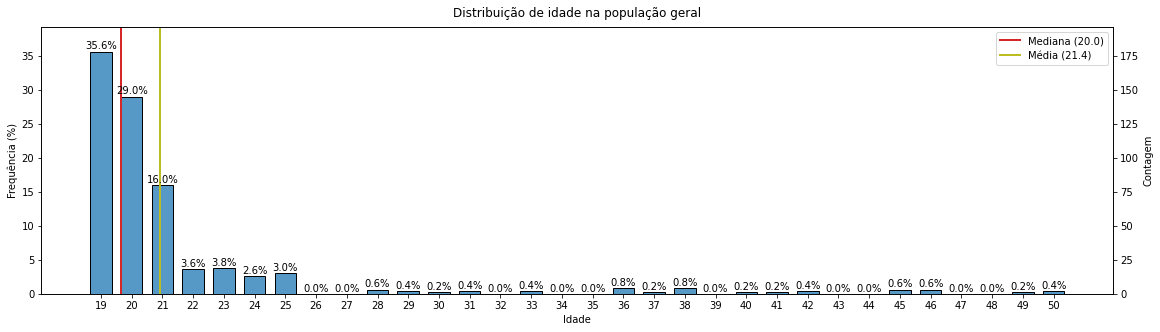

In [7]:
fig, ax1 = plt.subplots(figsize=(16, 4.5), constrained_layout=True)

graph = sns.histplot(data['idade'], bins=np.arange(data['idade'].min(), data['idade'].max()+2, 1), ax=ax1, shrink=0.7)
graph.axvline(data['idade'].quantile(0.5)+0.15, label='Mediana', color='C3', linewidth=2, linestyle='-')
graph.axvline(data['idade'].mean()+0.03, label='Média', color='C8', linewidth=2, linestyle='-')
graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
graph.set_xticks(xticks_location, np.arange(data['idade'].min(), data['idade'].max()+1, 1))

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['idade'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

graph.set(xlabel='Idade', ylabel='Contagem')
graph.set_title('Distribuição de idade na população geral', pad=10)

plt.show()

fig.savefig('imagens/Distribuição de idade na população geral.svg')

##### **Gênero**

In [8]:
data['sexo'].value_counts()

feminino     250
masculino    250
Name: sexo, dtype: int64

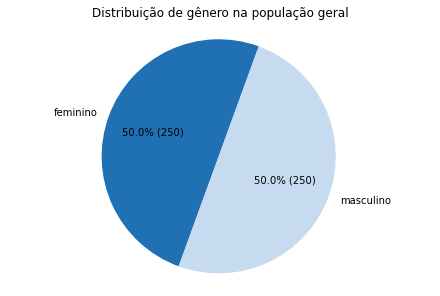

In [9]:
fig, axs = plt.subplots(constrained_layout=True)

sexo_labels = data['sexo'].value_counts().index
sexo_values = data['sexo'].value_counts().values

graph = axs.pie(sexo_values, labels=sexo_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*sexo_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de gênero na população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição de gênero na população geral.svg')

##### **Cor**

In [10]:
data['cor'].value_counts()

branca    430
preta      70
Name: cor, dtype: int64

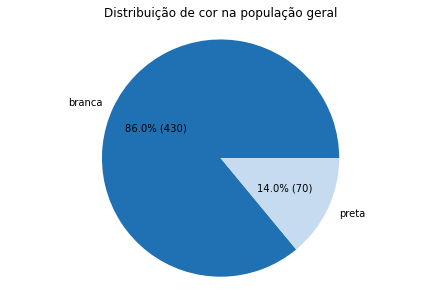

In [11]:
fig, axs = plt.subplots(constrained_layout=True)

cor_labels = data['cor'].value_counts().index
cor_values = data['cor'].value_counts().values

graph = axs.pie(cor_values, labels=cor_labels, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*cor_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de cor na população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição de cor na população geral.svg')

##### **Escola**

In [12]:
data['escola'].value_counts()

privada    264
pública    236
Name: escola, dtype: int64

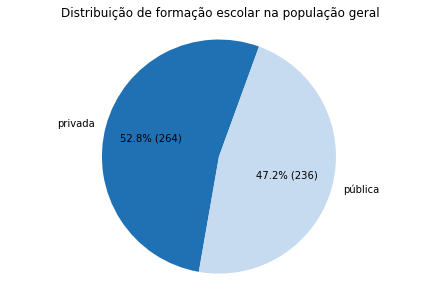

In [13]:
fig, axs = plt.subplots(constrained_layout=True)

escola_labels = data['escola'].value_counts().index
escola_values = data['escola'].value_counts().values

graph = axs.pie(escola_values, labels=escola_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*escola_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de formação escolar na população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição de formação escolar na população geral.svg')

##### **Localização**

In [14]:
data['cidade'].value_counts()

São Paulo    500
Name: cidade, dtype: int64

**Importação do mapa**

In [15]:
sp_map = gpd.read_file('data/shapefiles/DEINFO_DISTRITO.shp')
sp_map = sp_map.to_crs(4326)

In [16]:
# fig, axs = plt.subplots(figsize=(20, 10), constrained_layout=True)

# sp_map.plot(ax=axs)

# axs.set(xlabel='Longitude', ylabel='Latitude')
# axs.set_title('Mapa dos distritos de São Paulo', pad=10)
# plt.show()

# fig.savefig('imagens/Mapa dos distritos de São Paulo.svg')

**Requisições na API de endereços**

In [17]:
# from configparser import ConfigParser
# from geopy.geocoders import GoogleV3

# config = ConfigParser()
# config.read('data/credentials.cfg')
# api_key= config.get('GOOGLE API', 'API_KEY')

# geolocator = GoogleV3(api_key=api_key)

# data['coordenadas_long_lat'] = pd.NA
# data['distrito'] = pd.NA
# puc_point = Point(-46.671184851274276, -23.53807279812106)
# data['distancia_ate_puc'] = pd.NA

# for index, estudante in data.iterrows():
#     print(index)
#     endereco = f'{estudante.logradouro}, {estudante.numero} - {estudante.bairro}, {estudante.cidade} - {estudante.uf}, Brasil, {estudante.cep}'
#     location = geolocator.geocode(endereco)

#     coordenadas = f'{location.longitude}, {location.latitude}'
#     data.loc[index, 'coordenadas_long_lat'] = coordenadas

#     mapa_distancia = gpd.GeoDataFrame({'geometry': [puc_point, Point(eval(data.loc[index, 'coordenadas_long_lat']))]}, crs='EPSG:4326')
#     mapa_distancia = mapa_distancia.to_crs('EPSG:5880')
#     distancia = mapa_distancia.distance(mapa_distancia.shift())[1]
#     data.loc[index, 'distancia_ate_puc'] = distancia
    
#     try:
#         distrito = sp_map[sp_map.contains(Point(eval(coordenadas))) == True].NOME_DIST.iloc[0]
#     except:
#         distrito = sp_map.loc[sp_map.distance(Point(eval(coordenadas))).sort_values().index[0], 'NOME_DIST']
#     data.loc[index, 'distrito'] = distrito

# data.to_csv('data/data.csv', index=False)

In [18]:
data = pd.read_csv('data/data.csv')

In [19]:
quantidade_distrito = pd.DataFrame(data['distrito'].value_counts())
quantidade_distrito.index.names = ['NOME_DIST']

sp_map = sp_map.join(quantidade_distrito, on='NOME_DIST')
sp_map = sp_map.rename(columns={'distrito': 'count'})

sp_map['count'] = sp_map['count'].fillna(0)

**Criação do Mapa de Calor**

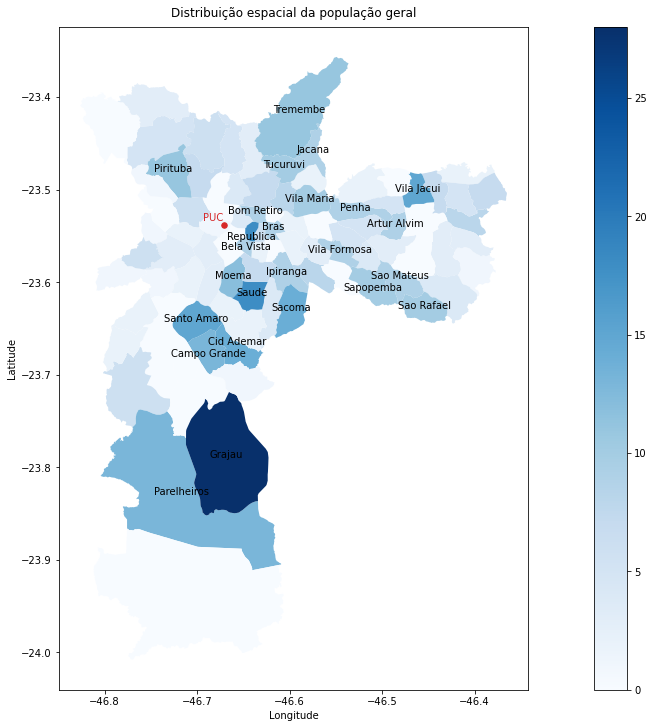

In [20]:
fig, axs = plt.subplots(figsize=(20, 10), constrained_layout=True)

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=sp_map['count'].min(), vmax=sp_map['count'].max()))

cbar = fig.colorbar(sm)

sp_map.plot('count', cmap='Blues', ax=axs)

for index, row in sp_map.iterrows():
    if row['count'] >= sp_map['count'].quantile(0.75):
        x = row['geometry'].centroid.x
        y = row['geometry'].centroid.y
        if row['NOME_DIST'].title() == 'Republica':
            y -= 0.009
        if row['NOME_DIST'].title() == 'Bela Vista':
            y -= 0.004
        if row['NOME_DIST'].title() == 'Campo Grande':
            y -= 0.006
        elif row['NOME_DIST'].title() == 'Cid Ademar':
            y += 0.006
        elif row['NOME_DIST'].title() == 'Sao Mateus':
            y += 0.004
        elif row['NOME_DIST'].title() == 'Sapopemba':
            y -= 0.004
        plt.annotate(row['NOME_DIST'].title(), xy=(x, y), ha='center')

# points = [Point(eval(coordenada)) for coordenada in data['coordenadas_long_lat']]
# geo_points = gpd.GeoDataFrame(geometry=points)
# geo_points.plot(ax=axs, marker='o', color='C3', markersize=5)

puc_coords = (-46.671184851274276, -23.53807279812106)
puc = gpd.GeoDataFrame(geometry=[Point(puc_coords)])
puc.plot(ax=axs, marker='o', color='C3', markersize=30)
plt.annotate('PUC', xy=(puc_coords[0], puc_coords[1]+0.002), ha='right', va='bottom', color='C3')

axs.set(xlabel='Longitude', ylabel='Latitude')
axs.set_title('Distribuição espacial da população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição espacial da população geral.svg')

**Distância à PUC**

In [21]:
data['distancia_ate_puc'].astype('float').describe()

count      500.000000
mean     13671.446030
std       7954.453727
min       1719.457950
25%       7686.081851
50%      12478.429468
75%      19287.422857
max      36972.723077
Name: distancia_ate_puc, dtype: float64

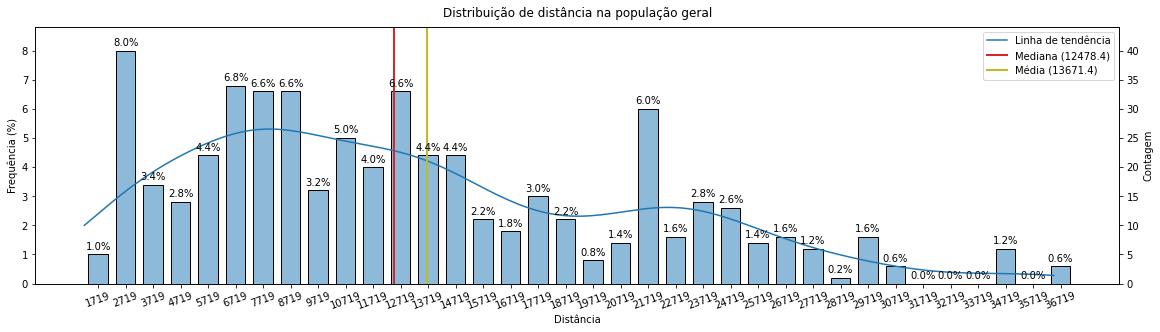

In [22]:
fig, ax1 = plt.subplots(figsize=(16, 4.5), constrained_layout=True)

graph = sns.histplot(data['distancia_ate_puc'], bins=np.arange(data['distancia_ate_puc'].min(), data['distancia_ate_puc'].max()+1000, 1000), kde=True, ax=ax1, shrink=0.7)
graph.axvline(data['distancia_ate_puc'].quantile(0.5)+500, label='Mediana', color='C3', linewidth=2, linestyle='-')
graph.axvline(data['distancia_ate_puc'].mean()+500, label='Média', color='C8', linewidth=2, linestyle='-')
graph.legend(labels=['Linha de tendência', f'Mediana ({data["distancia_ate_puc"].quantile(0.5):.1f})', f'Média ({data["distancia_ate_puc"].mean():.1f})'])

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
graph.set_xticks(xticks_location, np.arange(round(data['distancia_ate_puc'].min()), round(data['distancia_ate_puc'].max())+500, 1000), rotation=20)

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['distancia_ate_puc'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

graph.set(xlabel='Distância', ylabel='Contagem')
graph.set_title('Distribuição de distância na população geral', pad=10)

plt.show()

fig.savefig('imagens/Distribuição de distância na população geral.svg')

##### **Renda**

In [23]:
data['renda'].describe()

count       500.00000
mean       8353.38346
std       67272.57730
min          17.00000
25%        1179.99000
50%        1846.38000
75%        2759.37000
max      945542.00000
Name: renda, dtype: float64

In [24]:
renda_IQR = data['renda'].quantile(0.75) - data['renda'].quantile(0.25)
renda_filter = (data['renda'] >= data['renda'].quantile(0.25) - 1.5*renda_IQR) & (data['renda'] <= data['renda'].quantile(0.75) + 1.5*renda_IQR)

In [25]:
data['renda'][renda_filter].describe()

count     454.000000
mean     1885.450308
std      1023.640566
min        17.000000
25%      1134.240000
50%      1730.430000
75%      2352.790000
max      5099.640000
Name: renda, dtype: float64

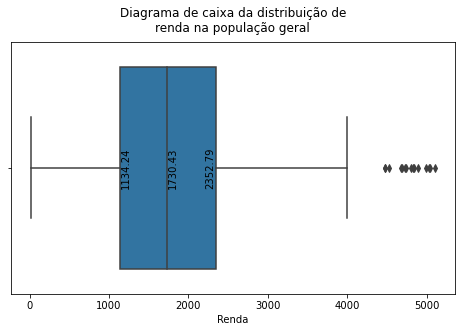

In [26]:
fig, axs = plt.subplots(figsize=(6.3, 4.5), constrained_layout=True)

graph = sns.boxplot(x=data['renda'][renda_filter], ax=axs)
graph.set(xlabel='Renda')
graph.set_title('Diagrama de caixa da distribuição de\nrenda na população geral', pad=10)

def legend(data, quantile):
    data = data['renda'][renda_filter]
    
    iqr_range = data.quantile(0.75) - data.quantile(0.25)
    offset = 0.06*iqr_range
    if quantile == 0.75:
        offset *= -1
    
    graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)

legend(data, 0.25)
legend(data, 0.5)
legend(data, 0.75)
plt.show()

fig.savefig('imagens/Diagrama de caixa da distribuição de renda na população geral.svg')

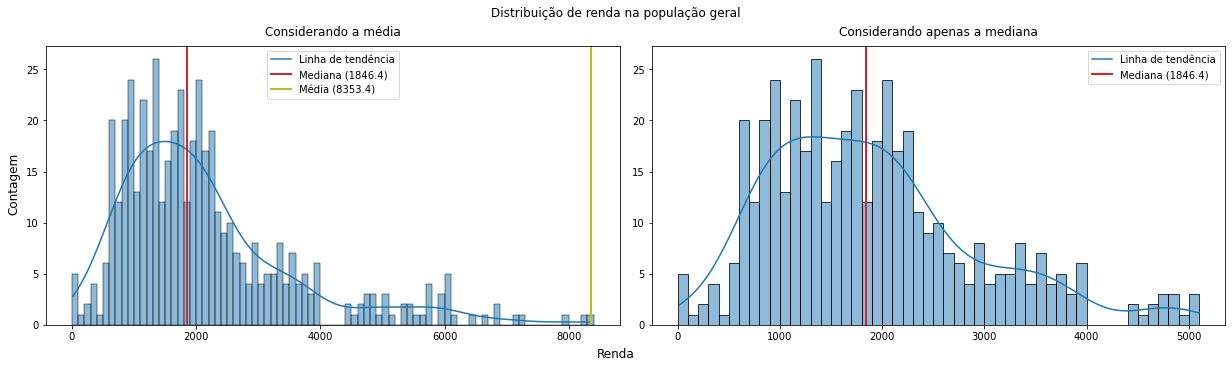

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), constrained_layout=True)

graph_1 = sns.histplot(data['renda'][data['renda'] <= data['renda'].mean()], bins=np.arange(0, data['renda'].mean()+100, 100), kde=True, ax=axs[0])
graph_1.set(xlabel='', ylabel='')
graph_1.axvline(data['renda'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph_1.axvline(data['renda'].mean(), label='Média', color='C8', linewidth=2, linestyle='-')
graph_1.legend(labels=['Linha de tendência', f'Mediana ({data["renda"].quantile(0.5):.1f})', f'Média ({data["renda"].mean():.1f})'])
graph_1.set_title('Considerando a média', pad=10)

graph_2 = sns.histplot(data['renda'][renda_filter], bins=np.arange(0, data['renda'][renda_filter].max()+1, 100), kde=True, ax=axs[1])
graph_2.set(xlabel='', ylabel='')
graph_2.axvline(data['renda'].quantile(0.5), label='Mediana', color='C3', linewidth=2, linestyle='-')
graph_2.legend(labels=['Linha de tendência', f'Mediana ({data["renda"].quantile(0.5):.1f})'])
graph_2.set_title('Considerando apenas a mediana', pad=10)

fig.supxlabel('Renda')
fig.supylabel('Contagem')
fig.suptitle('Distribuição de renda na população geral')
plt.show()

fig.savefig('imagens/Distribuição de renda na população geral.svg')

##### **Curso**

In [28]:
data['curso'].describe()

count          500
unique           9
top       história
freq            67
Name: curso, dtype: object

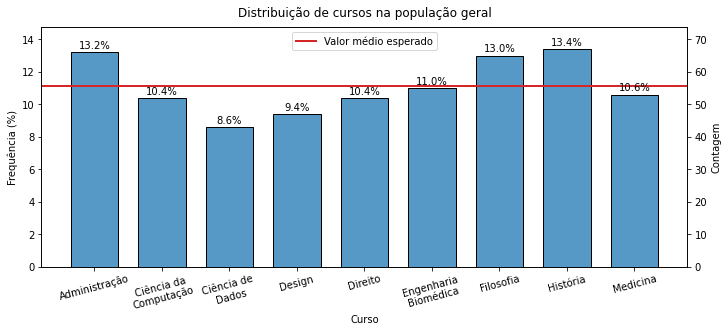

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 4.5), constrained_layout=True)

plt.xticks(range(9), ['Administração', 'Ciência da\nComputação', 'Ciência de\nDados', 'Design', 'Direito', 'Engenharia\nBiomédica', 'Filosofia', 'História', 'Medicina'], rotation=15)
graph = sns.histplot(data['curso'].sort_values(ascending=True), ax=ax1, shrink=0.7)
graph.axhline(data['curso'].count()/len(data['curso'].value_counts()), label='Valor médio esperado', color='C3', linewidth=2, linestyle='-')
graph.legend(labels=['Valor médio esperado'], loc='upper center')

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['curso'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

graph.set(xlabel='Curso', ylabel='Contagem')
graph.set_title('Distribuição de cursos na população geral', pad=10)

plt.show()

fig.savefig('imagens/Distribuição de cursos na população geral.svg')

##### **Conclusão do Curso**

**Encontrar percentuais de conclusão por estudante**

In [30]:
duracao_curso = {
    'ciência de dados': 3.5,
    'direito': 5,
    'medicina': 6,
    'história': 4,
    'administração': 4,
    'engenharia biomédica': 5,
    'design': 3,
    'ciência da computação': 4,
    'filosofia': 3,
}

data['porcentagem_concluida_curso'] = pd.NA
for index, aluno in data.iterrows():
    data.loc[index, ['porcentagem_concluida_curso']] = 100*(data['ano_curso'][index]/duracao_curso[data['curso'][index]])

**Análise**

In [31]:
data['porcentagem_concluida_curso'].astype('float').describe()

count    500.000000
mean      91.105238
std       31.846584
min       20.000000
25%       75.000000
50%       92.857143
75%      100.000000
max      166.666667
Name: porcentagem_concluida_curso, dtype: float64

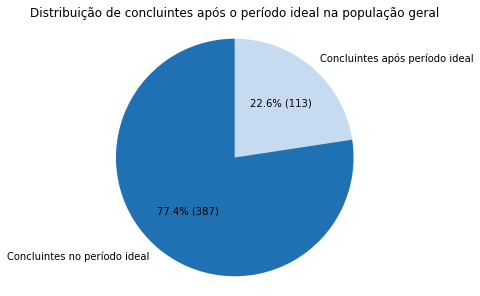

In [32]:
fig, axs = plt.subplots(constrained_layout=True)

porcentagem_concluida_labels = np.array(['Concluintes após período ideal', 'Concluintes no período ideal'])
porcentagem_concluida_values = np.array([data[data['porcentagem_concluida_curso'] > 100]['porcentagem_concluida_curso'].count(), data[data['porcentagem_concluida_curso'] <= 100]['porcentagem_concluida_curso'].count()])

graph = axs.pie(porcentagem_concluida_values, labels=porcentagem_concluida_labels, startangle=90-81.36, colors=[cmap_blues(0.25), cmap_blues(0.75)], autopct=lambda p: f'{p:.1f}% ({(p/100)*porcentagem_concluida_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de concluintes após o período ideal na população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição de concluintes após o período ideal na população geral.svg')

##### **Motivação**

In [33]:
data['motivação'].describe()

count    500.000000
mean       5.948000
std        3.181437
min        0.000000
25%        3.000000
50%        7.000000
75%        9.000000
max       10.000000
Name: motivação, dtype: float64

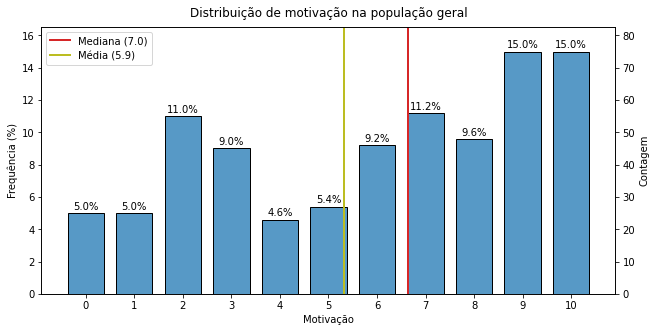

In [34]:
fig, ax1 = plt.subplots(figsize=(9, 4.5), constrained_layout=True)

graph = sns.histplot(data['motivação'], bins=np.arange(data['motivação'].min(), data['motivação'].max()+2, 1), ax=ax1, shrink=0.75)
graph.axvline(data['motivação'].quantile(0.5)+0.13, label='Mediana', color='C3', linewidth=2, linestyle='-')
graph.axvline(data['motivação'].mean()-0.13, label='Média', color='C8', linewidth=2, linestyle='-')
graph.legend(labels=[f'Mediana ({data["motivação"].quantile(0.5):.1f})', f'Média ({data["motivação"].mean():.1f})'])

xticks_location = [p.get_x() + p.get_width()/2 for p in ax1.patches]
graph.set_xticks(xticks_location, range(data['motivação'].min(), data['motivação'].max()+1, 1))

ax2 = ax1.twinx()
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax1.set_ylabel('Contagem')
ax2.set_ylabel('Frequência (%)')
ax1.set_ylim(ax1.get_ylim()[0], 1.05*ax1.get_ylim()[1])
ax2.set_ylim(0, 100*(ax1.get_ylim()[1]/data['motivação'].count()))

for p in ax1.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax1.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
    # ax1.annotate(int(y), (x.mean(), y-1), ha='center', va='top')

graph.set(xlabel='Motivação')
graph.set_title('Distribuição de motivação na população geral', pad=10)

plt.show()

fig.savefig('imagens/Distribuição de motivação na população geral.svg')

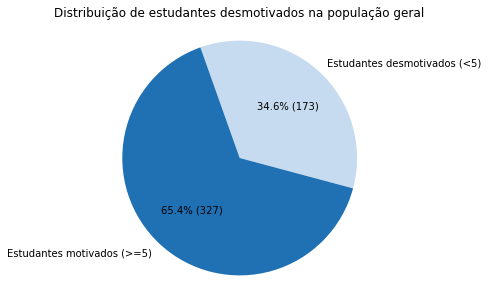

In [35]:
fig, axs = plt.subplots(constrained_layout=True)

estudantes_desmotivados_labels = np.array(['Estudantes desmotivados (<5)', 'Estudantes motivados (>=5)'])
estudantes_desmotivados_values = np.array([data[data['motivação'] < 5].shape[0], data[data['motivação'] >= 5].shape[0]])

graph = axs.pie(estudantes_desmotivados_values, labels=estudantes_desmotivados_labels, startangle=-15, colors=[cmap_blues(0.25), cmap_blues(0.75)], autopct=lambda p: f'{p:.1f}% ({(p/100)*estudantes_desmotivados_values.sum():n})')
axs.axis('equal')
axs.set_title('Distribuição de estudantes desmotivados na população geral', pad=10)
plt.show()

fig.savefig('imagens/Distribuição de estudantes desmotivados na população geral.svg')

### **Análise variável x variável**

##### **Conclusão do Curso**

In [36]:
concluintes_apos_periodo_ideal = data[data['porcentagem_concluida_curso'] > 100]

**Idade**

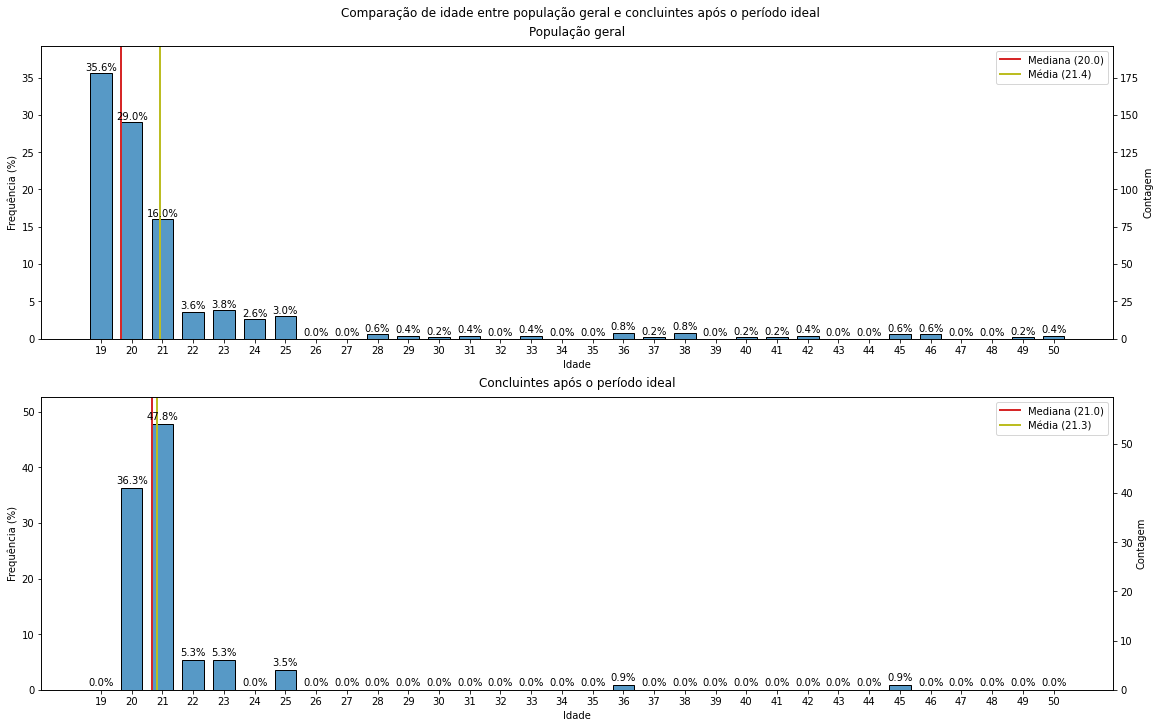

In [37]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title):
    graph = sns.histplot(data['idade'], bins=np.arange(19, 52, 1), ax=axs, shrink=0.7)
    graph.axvline(data['idade'].quantile(0.5)+0.15, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['idade'].mean()+0.03, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, np.arange(19, 51, 1))

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['idade'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Idade', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de idade entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de idade entre população geral e concluintes após o período ideal.svg')

**Gênero**

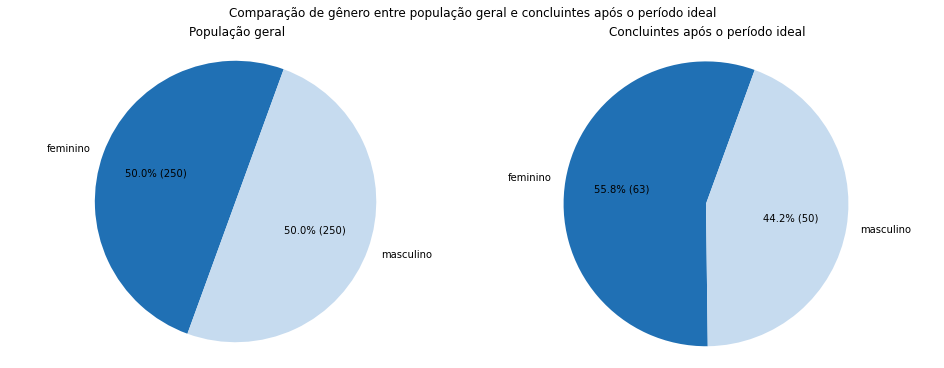

In [38]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    sexo_labels = data['sexo'].value_counts().index
    sexo_values = data['sexo'].value_counts().values

    graph = axs.pie(sexo_values, labels=sexo_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*sexo_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de gênero entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de gênero entre população geral e concluintes após o período ideal.svg')

**Cor**

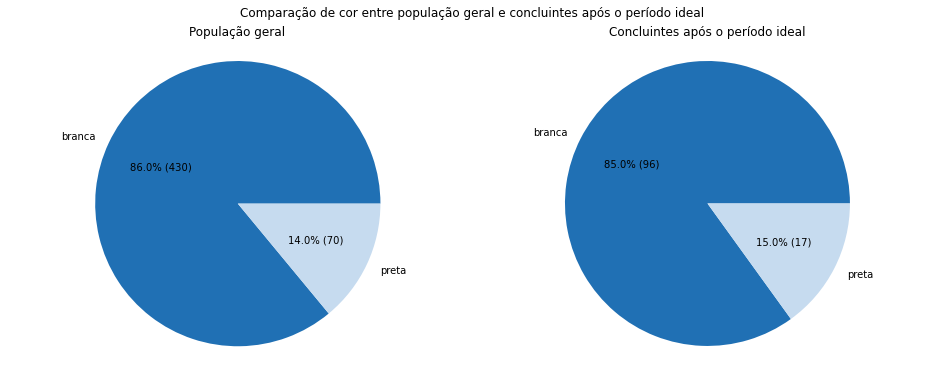

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    cor_labels = data['cor'].value_counts().index
    cor_values = data['cor'].value_counts().values

    graph = axs.pie(cor_values, labels=cor_labels, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*cor_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de cor entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de cor entre população geral e concluintes após o período ideal.svg')

**Escola**

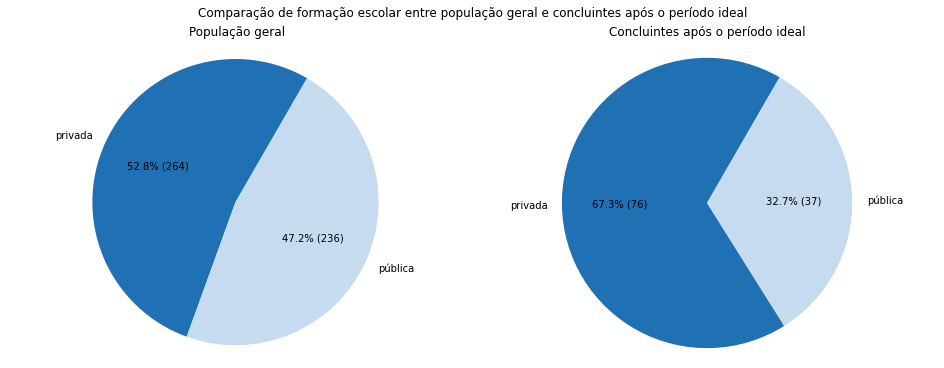

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    escola_labels = data['escola'].value_counts().index
    escola_values = data['escola'].value_counts().values

    graph = axs.pie(escola_values, labels=escola_labels, startangle=60, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*escola_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de formação escolar entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de formação escolar entre população geral e concluintes após ideal.svg')

**Localização**

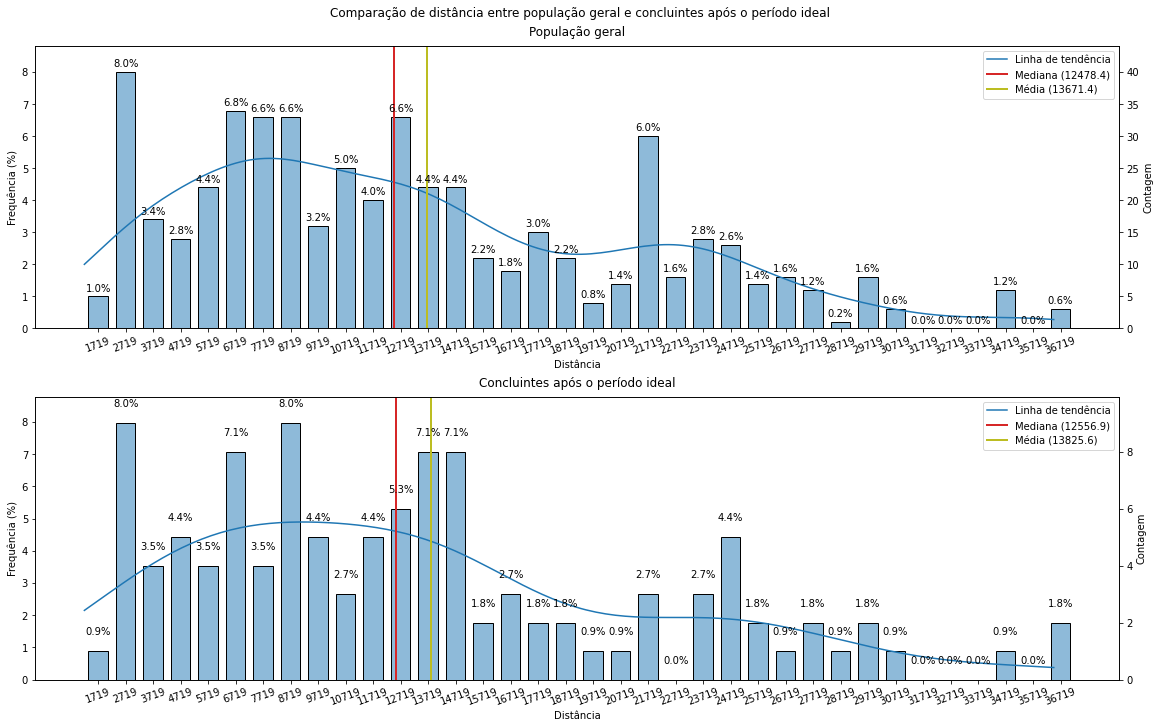

In [41]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title):
    graph = sns.histplot(data['distancia_ate_puc'], bins=np.arange(data['distancia_ate_puc'].min(), data['distancia_ate_puc'].max()+1000, 1000), kde=True, ax=axs, shrink=0.7)
    graph.axvline(data['distancia_ate_puc'].quantile(0.5)+500, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['distancia_ate_puc'].mean()+500, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=['Linha de tendência', f'Mediana ({data["distancia_ate_puc"].quantile(0.5):.1f})', f'Média ({data["distancia_ate_puc"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, range(round(data['distancia_ate_puc'].min()), round(data['distancia_ate_puc'].max())+500, 1000), rotation=20)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['distancia_ate_puc'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Distância', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de distância entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de distância entre população geral e concluintes após ideal.svg')

**Renda**

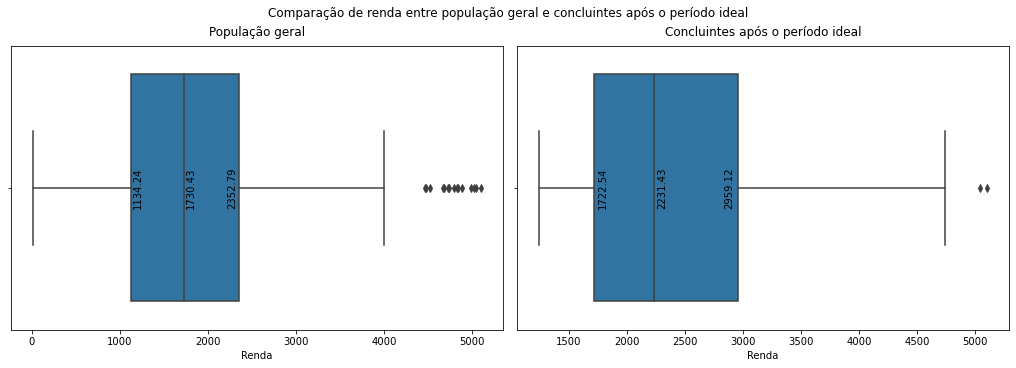

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)



plot(axs[0], data, 'População geral')
plot(axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal')
fig.suptitle('Comparação de renda entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de renda entre população geral e concluintes após o período ideal.svg')

**Cursos**

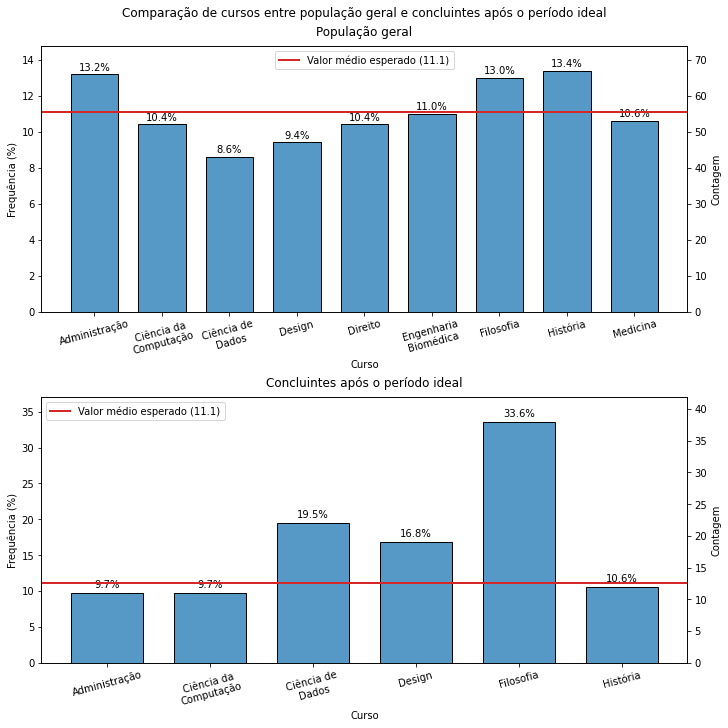

In [43]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10), constrained_layout=True)


def plot(index, axs, dados, title, subjects_list):
    graph = sns.histplot(dados['curso'].sort_values(ascending=True), ax=axs, shrink=0.7)
    graph.set_xticks(range(len(subjects_list)), subjects_list, rotation=15)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/dados['curso'].count()))
    
    ax2.axhline(100/len(data['curso'].value_counts()), label='Valor médio esperado', color='C3', linewidth=2, linestyle='-')
    
    if index == 0:
        legend_loc = 'upper center'
    elif index == 1:
        legend_loc = 'upper left'
    
    ax2.legend(labels=[f'Valor médio esperado ({100/len(data["curso"].value_counts()):.1f})'], loc=legend_loc)

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(dados)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Curso', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(0, axs[0], data, 'População geral', ['Administração', 'Ciência da\nComputação', 'Ciência de\nDados', 'Design', 'Direito', 'Engenharia\nBiomédica', 'Filosofia', 'História', 'Medicina'])
plot(1, axs[1], concluintes_apos_periodo_ideal, 'Concluintes após o período ideal', ['Administração', 'Ciência da\nComputação', 'Ciência de\nDados', 'Design', 'Filosofia', 'História'])
fig.suptitle('Comparação de cursos entre população geral e concluintes após o período ideal')
plt.show()

fig.savefig('imagens/Comparação de cursos entre população geral e concluintes após o período ideal.svg')

##### **Motivação**

In [44]:
estudantes_desmotivados = data[data['motivação'] < 5]

**Idade**

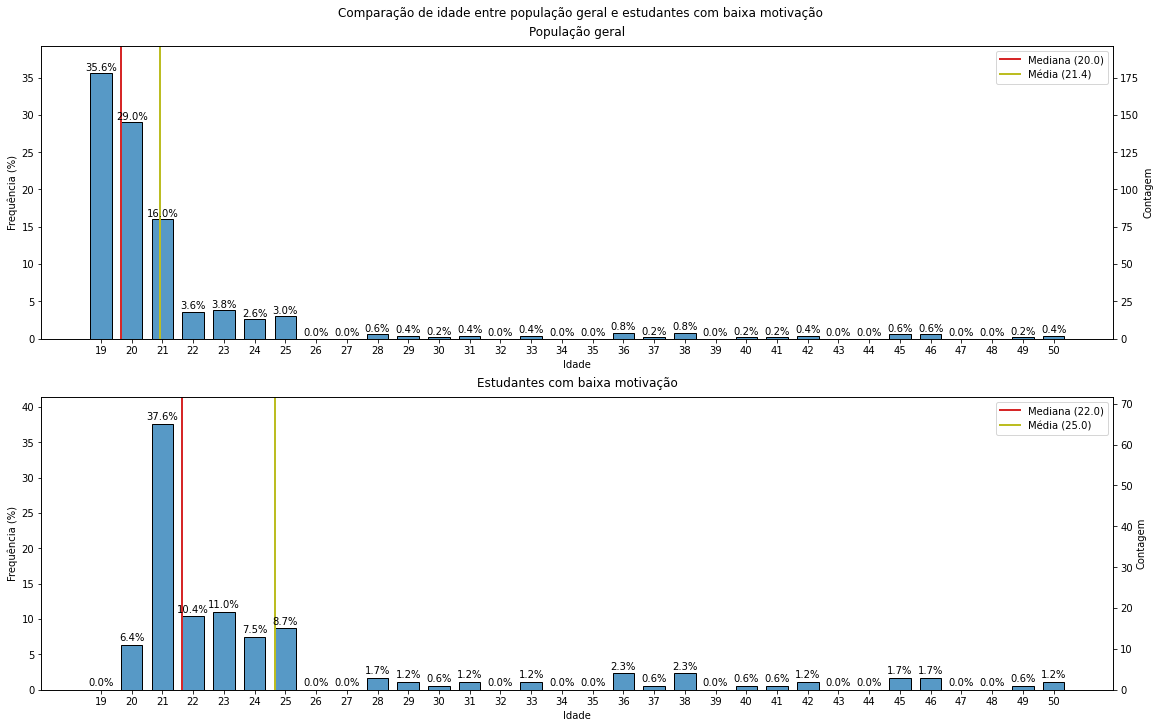

In [45]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title, mean_offset):
    graph = sns.histplot(data['idade'], bins=np.arange(19, 52, 1), ax=axs, shrink=0.7)
    graph.axvline(data['idade'].quantile(0.5)+0.15, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['idade'].mean()+mean_offset, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, np.arange(19, 51, 1))

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['idade'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Idade', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral', 0.03)
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação', 0.15)
fig.suptitle('Comparação de idade entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de idade entre população geral e estudantes com baixa motivação.svg')

**Gênero**

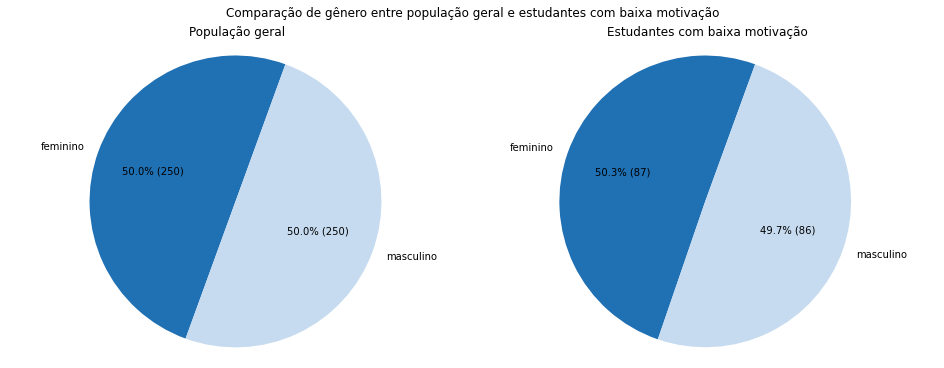

In [46]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    sexo_labels = data['sexo'].value_counts().index
    sexo_values = data['sexo'].value_counts().values

    graph = axs.pie(sexo_values, labels=sexo_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*sexo_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de gênero entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de gênero entre população geral e estudantes com baixa motivação.svg')

**Cor**

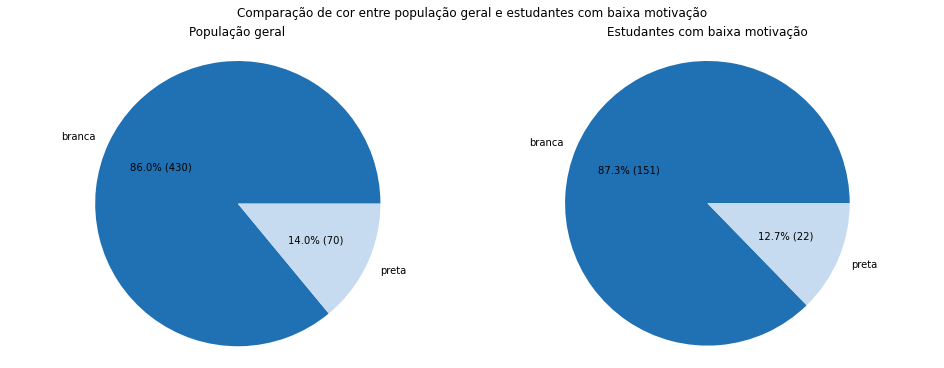

In [47]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    cor_labels = data['cor'].value_counts().index
    cor_values = data['cor'].value_counts().values

    graph = axs.pie(cor_values, labels=cor_labels, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*cor_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de cor entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de cor entre população geral e estudantes com baixa motivação.svg')

**Escola**

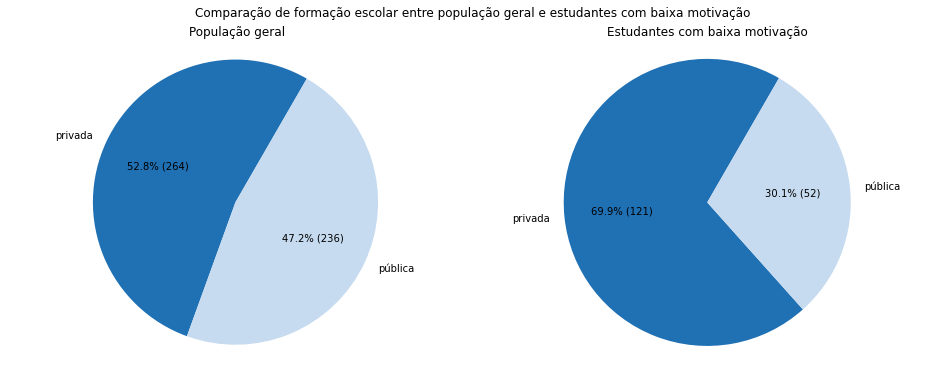

In [48]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    escola_labels = data['escola'].value_counts().index
    escola_values = data['escola'].value_counts().values

    graph = axs.pie(escola_values, labels=escola_labels, startangle=60, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*escola_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de formação escolar entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de formação escolar entre geral e estudantes desmotivados.svg')

**Localização**

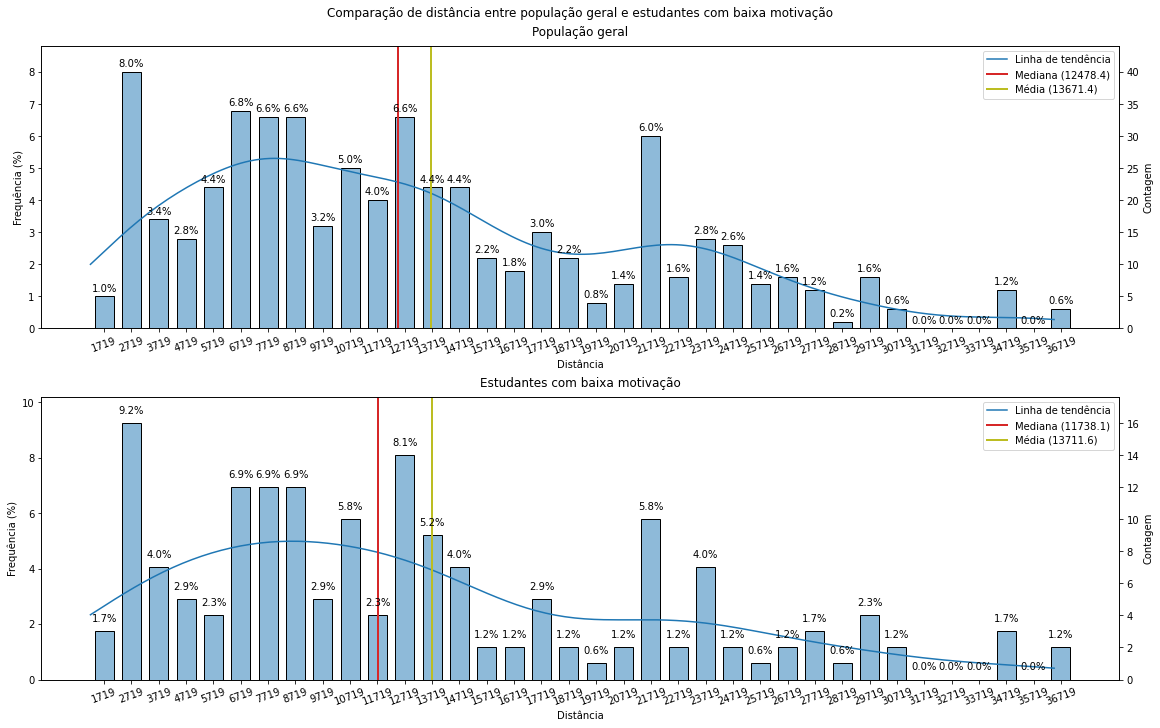

In [49]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title):
    graph = sns.histplot(data['distancia_ate_puc'], bins=np.arange(data['distancia_ate_puc'].min(), data['distancia_ate_puc'].max()+1000, 1000), kde=True, ax=axs, shrink=0.7)
    graph.axvline(data['distancia_ate_puc'].quantile(0.5)+500, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['distancia_ate_puc'].mean()+500, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=['Linha de tendência', f'Mediana ({data["distancia_ate_puc"].quantile(0.5):.1f})', f'Média ({data["distancia_ate_puc"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, range(round(data['distancia_ate_puc'].min()), round(data['distancia_ate_puc'].max())+500, 1000), rotation=20)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['distancia_ate_puc'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Distância', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de distância entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de distância entre população geral e estudantes desmotivados.svg')

**Renda**

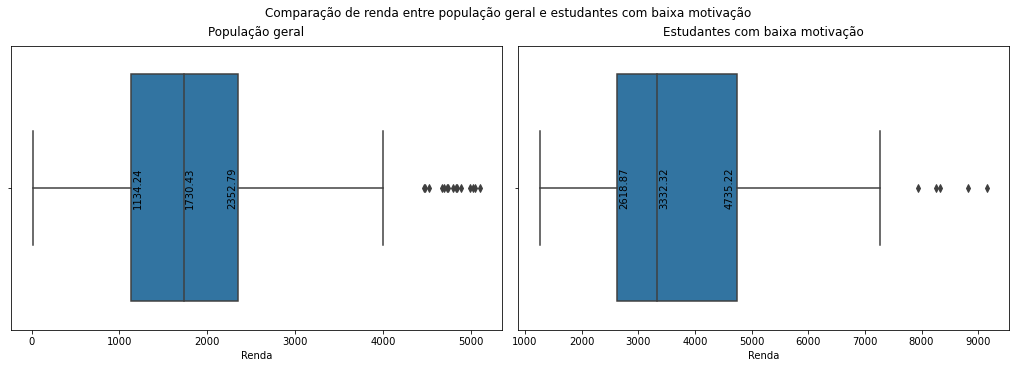

In [50]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data, 'População geral')
plot(axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de renda entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de renda entre população geral e estudantes com baixa motivação.svg')

**Cursos**

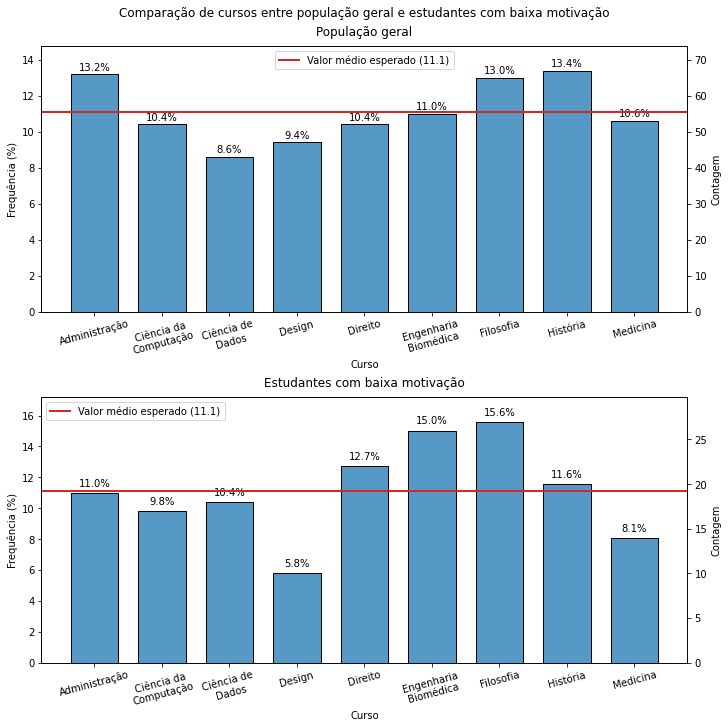

In [51]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10), constrained_layout=True)


def plot(index, axs, dados, title):
    graph = sns.histplot(dados['curso'].sort_values(ascending=True), ax=axs, shrink=0.7)
    graph.set_xticks(range(9), ['Administração', 'Ciência da\nComputação', 'Ciência de\nDados', 'Design', 'Direito', 'Engenharia\nBiomédica', 'Filosofia', 'História', 'Medicina'], rotation=15)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/dados['curso'].count()))
    
    ax2.axhline(100/len(data['curso'].value_counts()), label='Valor médio esperado', color='C3', linewidth=2, linestyle='-')
    
    if index == 0:
        legend_loc = 'upper center'
    elif index == 1:
        legend_loc = 'upper left'
    
    ax2.legend(labels=[f'Valor médio esperado ({100/len(data["curso"].value_counts()):.1f})'], loc=legend_loc)

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(dados)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Curso', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(0, axs[0], data, 'População geral')
plot(1, axs[1], estudantes_desmotivados, 'Estudantes com baixa motivação')
fig.suptitle('Comparação de cursos entre população geral e estudantes com baixa motivação')
plt.show()

fig.savefig('imagens/Comparação de cursos entre população geral e estudantes com baixa motivação.svg')

##### **Renda**

**Idade**

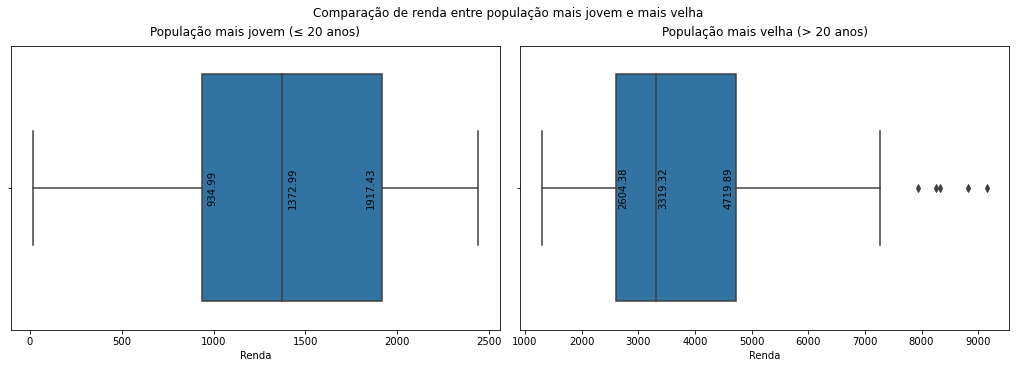

In [52]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)
    
    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data[data['idade'] <= data['idade'].quantile(0.5)], f'População mais jovem (≤ {data["idade"].quantile(0.5):n} anos)')
plot(axs[1], data[data['idade'] > data['idade'].quantile(0.5)], f'População mais velha (> {data["idade"].quantile(0.5):n} anos)')
fig.suptitle('Comparação de renda entre população mais jovem e mais velha')
plt.show()

fig.savefig('imagens/Comparação de renda entre população mais jovem e mais velha.svg')

**Gênero**

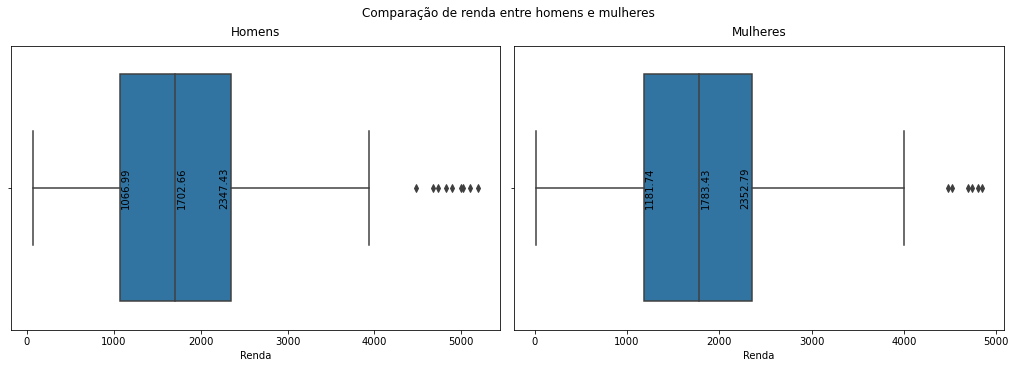

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data[data['sexo'] == 'masculino'], 'Homens')
plot(axs[1], data[data['sexo'] == 'feminino'], 'Mulheres')
fig.suptitle('Comparação de renda entre homens e mulheres')
plt.show()

fig.savefig('imagens/Comparação de renda entre homens e mulheres.svg')

**Cor**

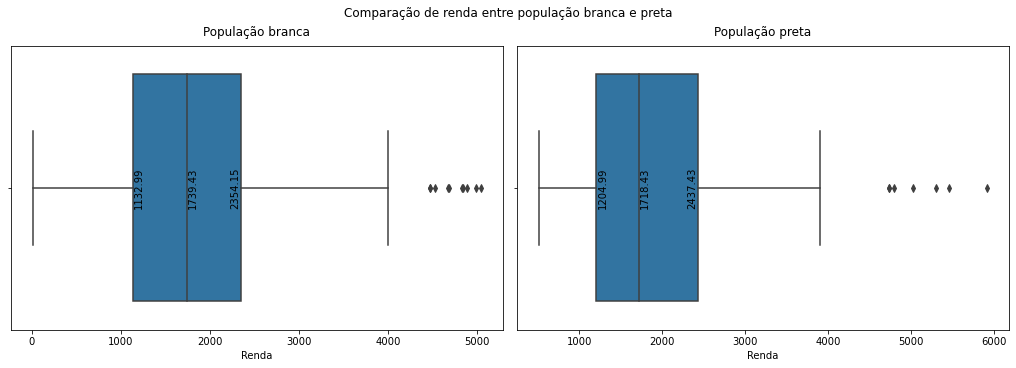

In [54]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data[data['cor'] == 'branca'], 'População branca')
plot(axs[1], data[data['cor'] == 'preta'], 'População preta')
fig.suptitle('Comparação de renda entre população branca e preta')
plt.show()

fig.savefig('imagens/Comparação de renda entre população branca e preta.svg')

**Escola**

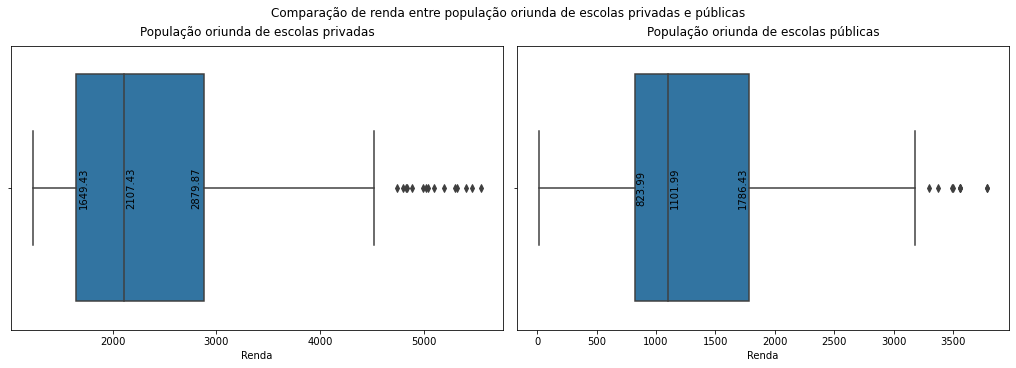

In [55]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data[data['escola'] == 'privada'], 'População oriunda de escolas privadas')
plot(axs[1], data[data['escola'] == 'pública'], 'População oriunda de escolas públicas')
fig.suptitle('Comparação de renda entre população oriunda de escolas privadas e públicas')
plt.show()

fig.savefig('imagens/Comparação de renda entre população oriunda de escolas privadas e públicas.svg')

**Localização**

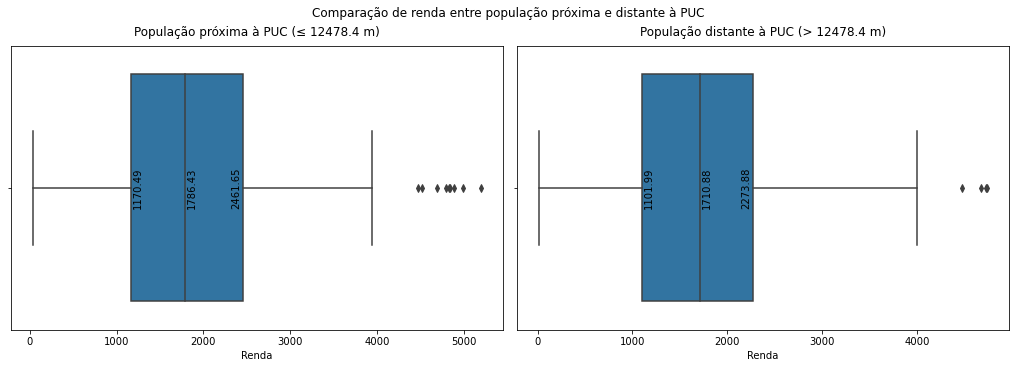

In [56]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0], data[data['distancia_ate_puc'] <= data['distancia_ate_puc'].quantile(0.5)], f'População próxima à PUC (≤ {data["distancia_ate_puc"].quantile(0.5):.1f} m)')
plot(axs[1], data[data['distancia_ate_puc'] > data['distancia_ate_puc'].quantile(0.5)], f'População distante à PUC (> {data["distancia_ate_puc"].quantile(0.5):.1f} m)')
fig.suptitle('Comparação de renda entre população próxima e distante à PUC')
plt.show()

fig.savefig('imagens/Comparação de renda entre população próxima e distante à PUC.svg')

**Cursos**

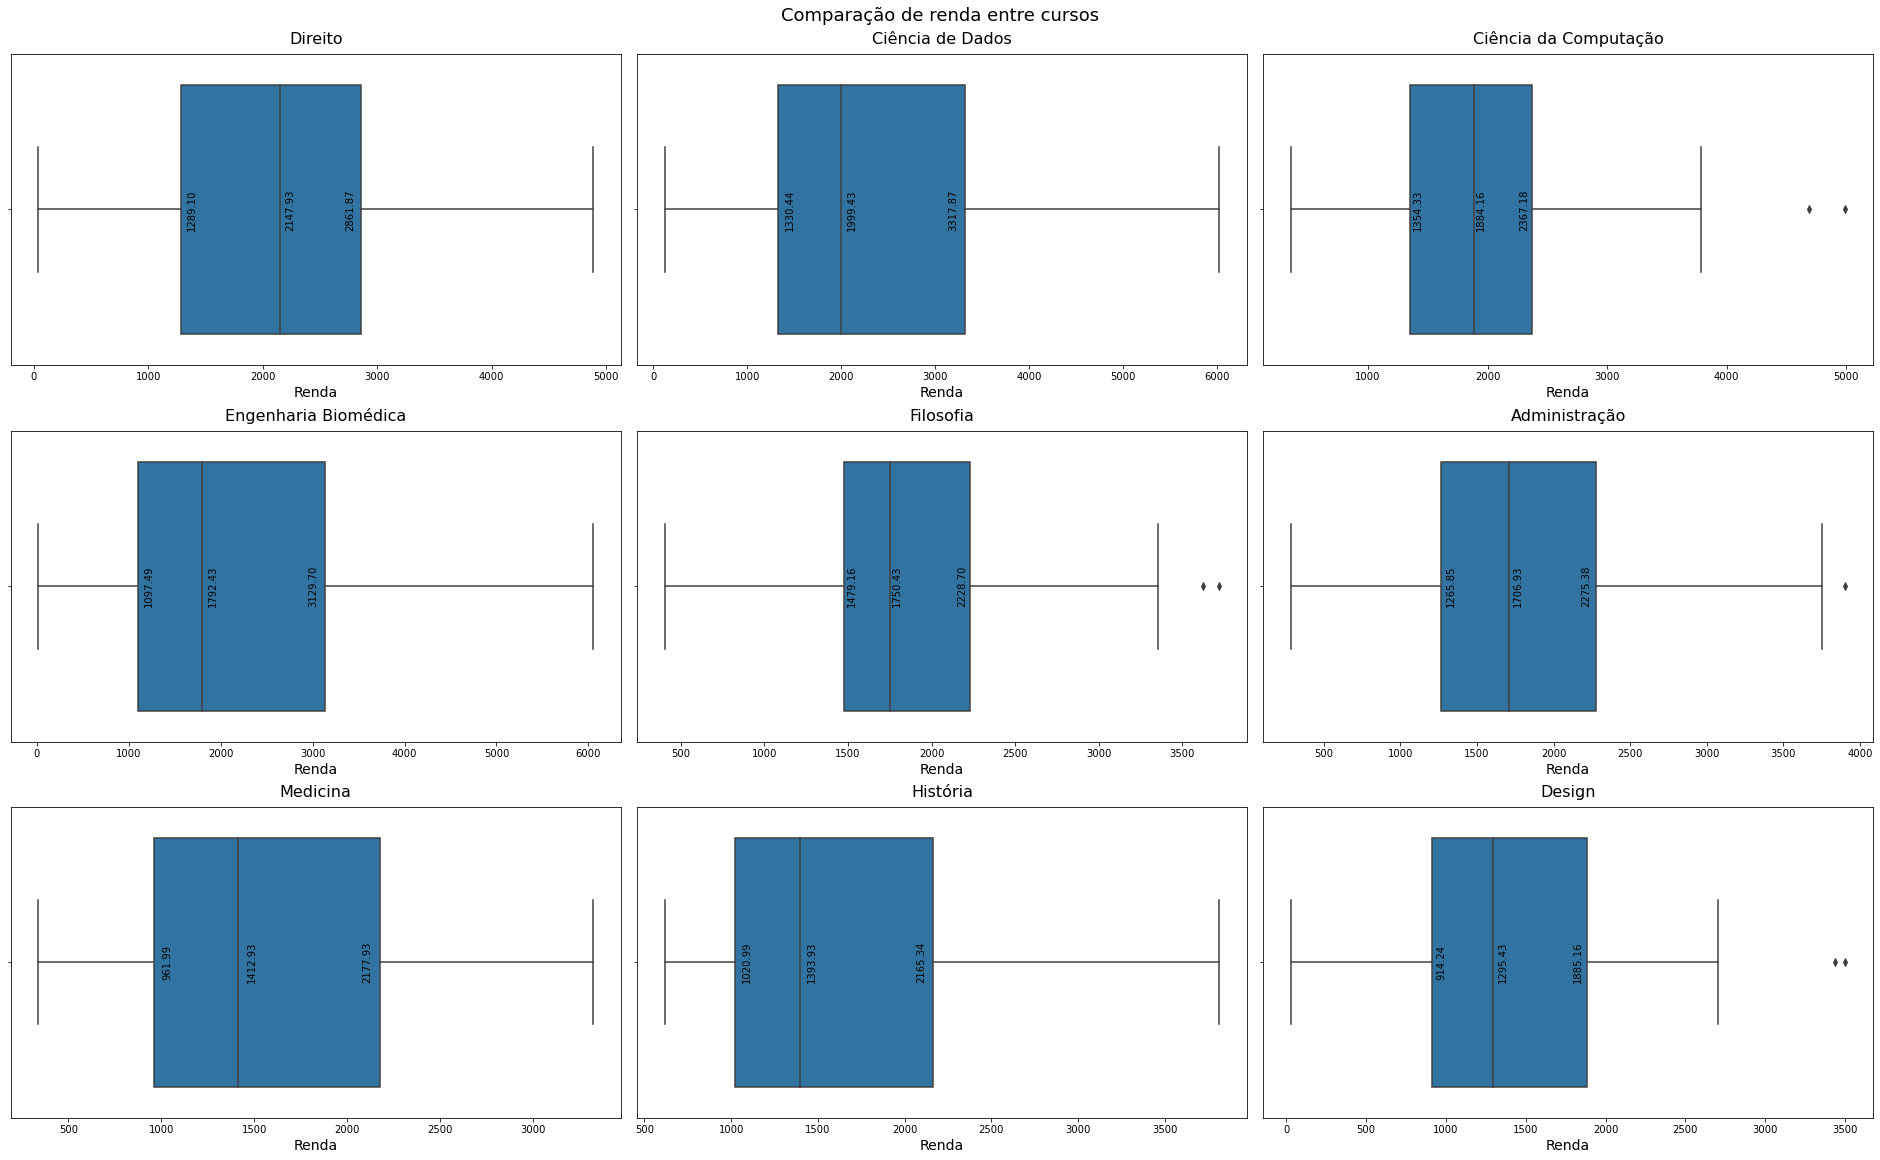

In [57]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(26, 16), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set_xlabel('Renda', fontsize=14)
    graph.set_title(title, pad=10, fontsize=16)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0, 0], data[data['curso'] == 'direito'], 'Direito')
plot(axs[0, 1], data[data['curso'] == 'ciência de dados'], 'Ciência de Dados')
plot(axs[0, 2], data[data['curso'] == 'ciência da computação'], 'Ciência da Computação')
plot(axs[1, 0], data[data['curso'] == 'engenharia biomédica'], 'Engenharia Biomédica')
plot(axs[1, 1], data[data['curso'] == 'filosofia'], 'Filosofia')
plot(axs[1, 2], data[data['curso'] == 'administração'], 'Administração')
plot(axs[2, 0], data[data['curso'] == 'medicina'], 'Medicina')
plot(axs[2, 1], data[data['curso'] == 'história'], 'História')
plot(axs[2, 2], data[data['curso'] == 'design'], 'Design')
fig.suptitle('Comparação de renda entre cursos', fontsize=18)
plt.show()

fig.savefig('imagens/Comparação de renda entre cursos.svg')

### **Correlações entre variáveis**

In [58]:
data_as_num = pd.read_csv('data/estudantes-pucsp.tsv', sep='\t')
data_as_num = data_as_num.rename(columns={'cod_curso': 'curso'})

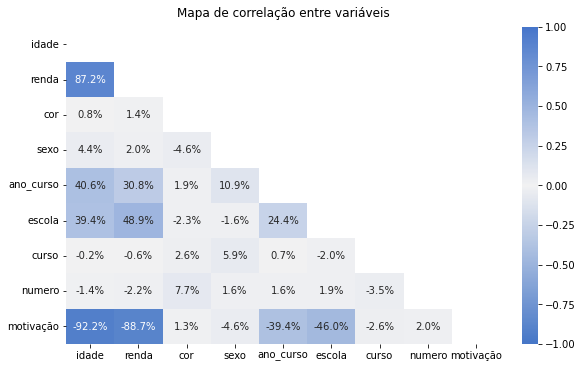

In [59]:
fig, axs = plt.subplots(figsize=(8, 5), constrained_layout=True)


def plot(axs, data, title):
    corr = data.corr(method='spearman')
    cmap = sns.diverging_palette(254, 255, sep=1, as_cmap=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    graph = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.1%', cmap=cmap, mask=mask, ax=axs)
    graph.set_title(title, pad=10)


plot(axs, data_as_num, 'Mapa de correlação entre variáveis')
plt.show()

fig.savefig('imagens/Mapa de correlação entre variáveis.svg')

### **Escolha do critério de concessão**

##### **Filtro inicial por renda**

In [60]:
salario_minimo = 1212

selecao = data[data['renda'] <= 3*salario_minimo].copy()

In [61]:
selecao.describe()

,idade,renda,ano_curso,numero,motivação,distancia_ate_puc
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,19.921801,1704.657986,3.732227,566.246445,6.827014,13637.549185
std,1.074891,801.772440,0.798963,283.353058,2.612946,7924.387202
min,19.000000,17.000000,1.000000,7.000000,2.000000,1719.457950
25%,19.000000,1073.490000,3.000000,329.000000,5.000000,7684.396250
50%,20.000000,1633.655000,4.000000,573.500000,7.000000,12478.429468
75%,20.000000,2220.092500,4.000000,820.000000,9.000000,19133.295940
max,25.000000,3624.650000,5.000000,997.000000,10.000000,36972.723077


##### **Análises universo x seleção**

**Idade**

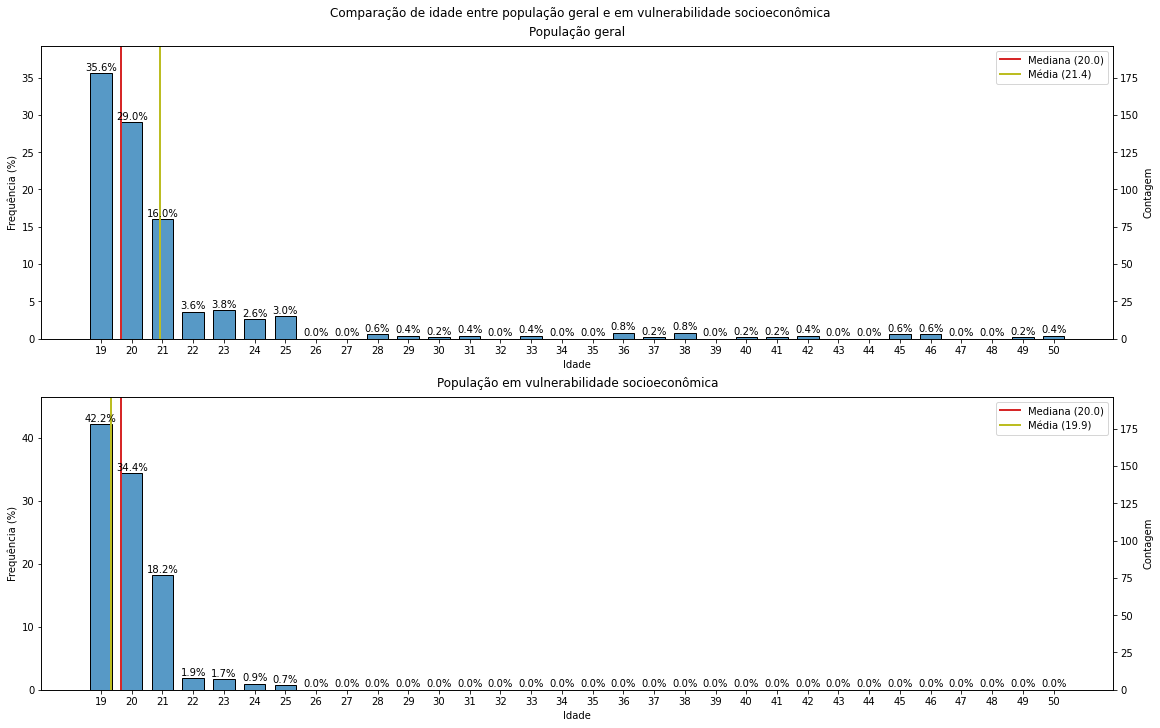

In [62]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title, mean_offset):
    graph = sns.histplot(data['idade'], bins=np.arange(19, 52, 1), ax=axs, shrink=0.7)
    graph.axvline(data['idade'].quantile(0.5)+0.15, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['idade'].mean()+mean_offset, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=[f'Mediana ({data["idade"].quantile(0.5):.1f})', f'Média ({data["idade"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, np.arange(19, 51, 1))

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['idade'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Idade', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral', 0.03)
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica', -0.1)
fig.suptitle('Comparação de idade entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de idade entre população geral e seleção.svg')

**Gênero**

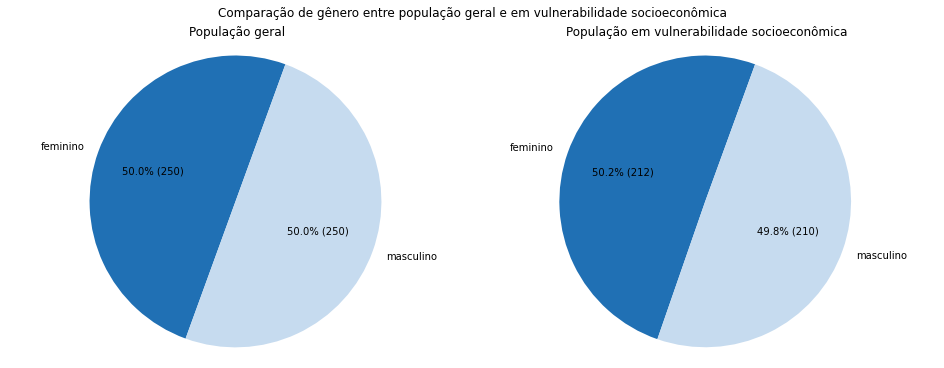

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    sexo_labels = data['sexo'].value_counts().index
    sexo_values = data['sexo'].value_counts().values

    graph = axs.pie(sexo_values, labels=sexo_labels, startangle=70, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*sexo_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de gênero entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de gênero entre população geral e seleção.svg')

**Cor**

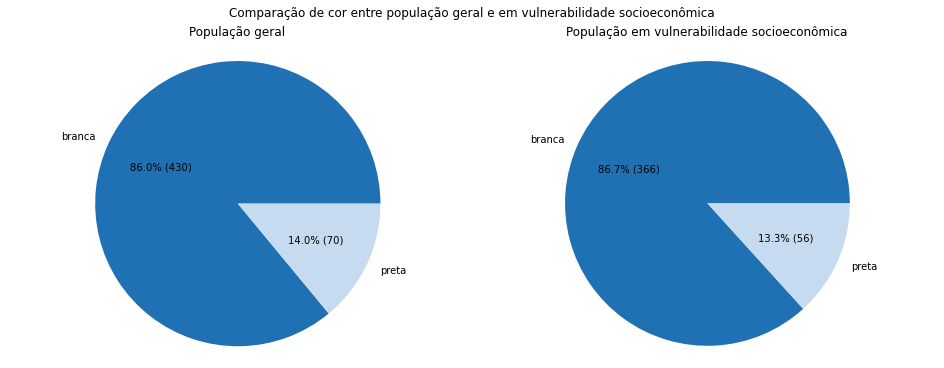

In [64]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    cor_labels = data['cor'].value_counts().index
    cor_values = data['cor'].value_counts().values

    graph = axs.pie(cor_values, labels=cor_labels, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*cor_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de cor entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de cor entre população geral e seleção.svg')

**Escola**

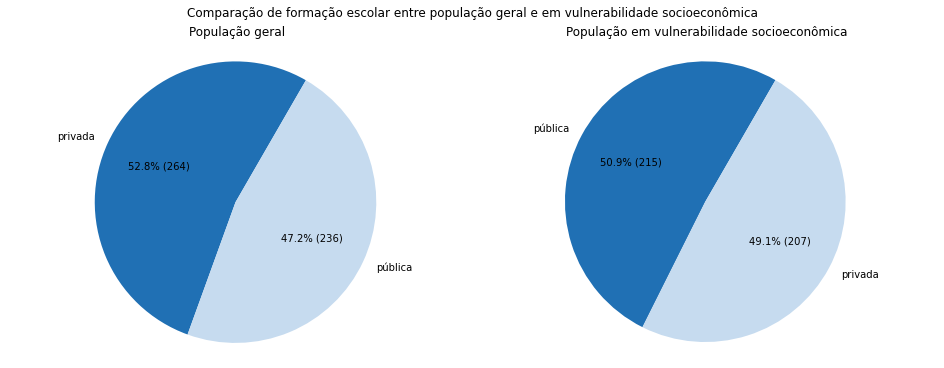

In [65]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    escola_labels = data['escola'].value_counts().index
    escola_values = data['escola'].value_counts().values

    graph = axs.pie(escola_values, labels=escola_labels, startangle=60, colors=[cmap_blues(0.75), cmap_blues(0.25)], autopct=lambda p: f'{p:.1f}% ({(p/100)*escola_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de formação escolar entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de formação escolar entre população geral e seleção.svg')

**Localização**

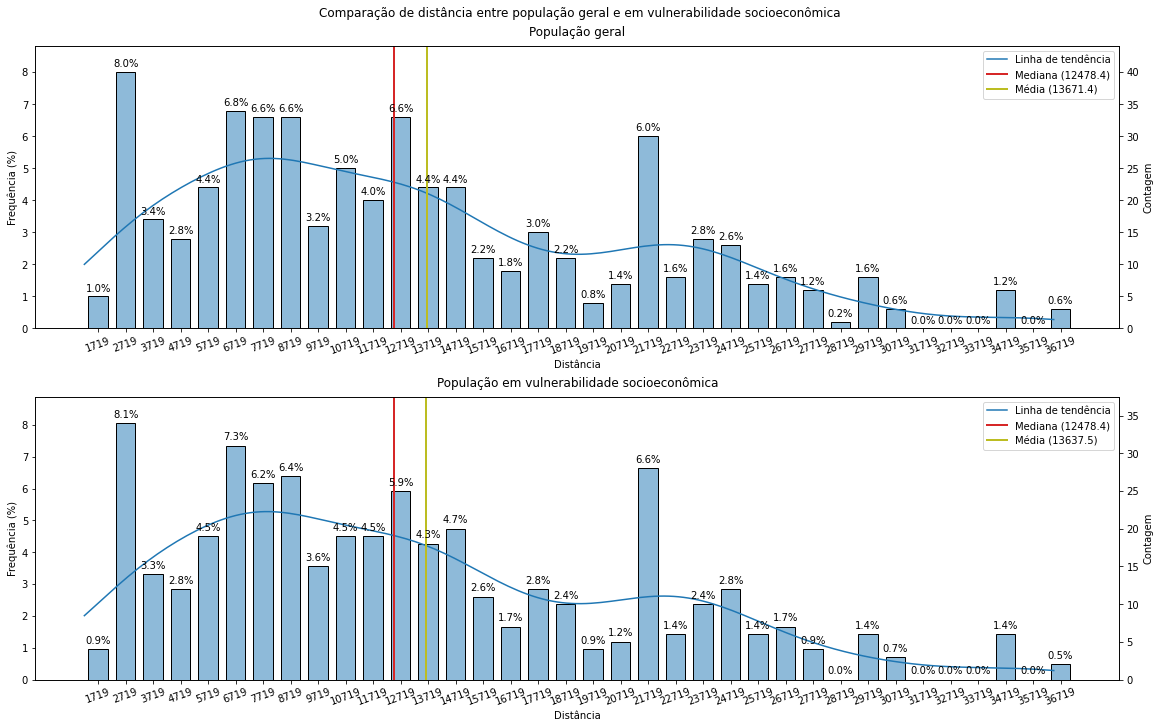

In [66]:
fig, axs = plt.subplots(nrows=2, figsize=(16, 10), constrained_layout=True)


def plot(axs, data, title):
    graph = sns.histplot(data['distancia_ate_puc'], bins=np.arange(data['distancia_ate_puc'].min(), data['distancia_ate_puc'].max()+1000, 1000), kde=True, ax=axs, shrink=0.7)
    graph.axvline(data['distancia_ate_puc'].quantile(0.5)+500, label='Mediana', color='C3', linewidth=2, linestyle='-')
    graph.axvline(data['distancia_ate_puc'].mean()+500, label='Média', color='C8', linewidth=2, linestyle='-')
    graph.legend(labels=['Linha de tendência', f'Mediana ({data["distancia_ate_puc"].quantile(0.5):.1f})', f'Média ({data["distancia_ate_puc"].mean():.1f})'])

    xticks_location = [p.get_x() + p.get_width()/2 for p in axs.patches]
    graph.set_xticks(xticks_location, range(round(data['distancia_ate_puc'].min()), round(data['distancia_ate_puc'].max())+500, 1000), rotation=20)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/data['distancia_ate_puc'].count()))

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(data)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Distância', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de distância entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de distância entre população geral e seleção.svg')

**Renda**

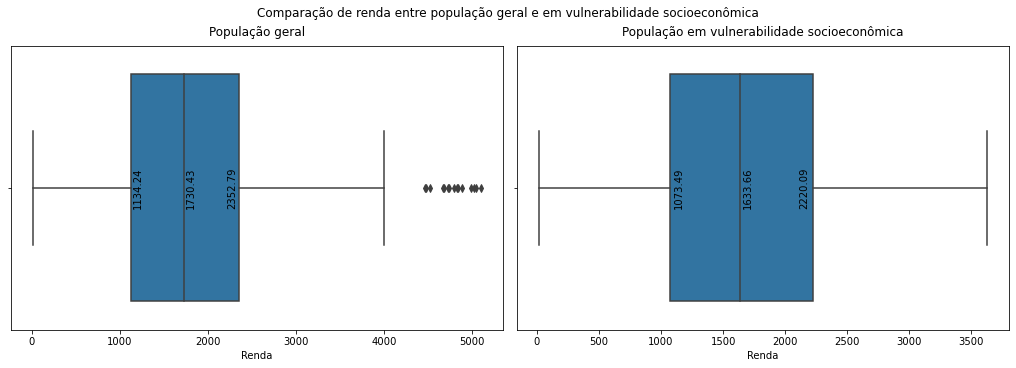

In [67]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)



plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de renda entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de renda entre população geral e seleção.svg')

**Curso**

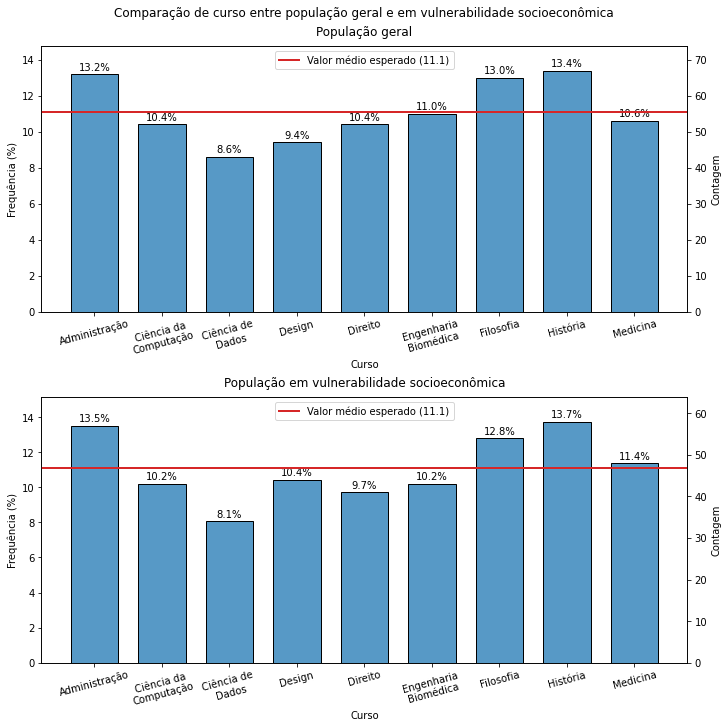

In [68]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 10), constrained_layout=True)


def plot(axs, dados, title):
    graph = sns.histplot(dados['curso'].sort_values(ascending=True), ax=axs, shrink=0.7)
    graph.set_xticks(range(9), ['Administração', 'Ciência da\nComputação', 'Ciência de\nDados', 'Design', 'Direito', 'Engenharia\nBiomédica', 'Filosofia', 'História', 'Medicina'], rotation=15)

    ax2 = axs.twinx()
    axs.yaxis.tick_right()
    ax2.yaxis.tick_left()
    axs.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    axs.set_ylabel('Contagem')
    ax2.set_ylabel('Frequência (%)')
    axs.set_ylim(axs.get_ylim()[0], 1.05*axs.get_ylim()[1])
    ax2.set_ylim(0, 100*(axs.get_ylim()[1]/dados['curso'].count()))
    
    ax2.axhline(100/len(data['curso'].value_counts()), label='Valor médio esperado', color='C3', linewidth=2, linestyle='-')
    ax2.legend(labels=[f'Valor médio esperado ({100/len(data["curso"].value_counts()):.1f})'], loc='upper center')

    for p in axs.patches:
        x = p.get_bbox().get_points()[:,0]
        y = p.get_bbox().get_points()[1,1]
        axs.annotate('{:.1f}%'.format(100.*y/len(dados)), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)
        # axs.annotate(int(y), (x.mean(), y+0.5), ha='center', va='bottom', fontsize=10)

    graph.set(xlabel='Curso', ylabel='Contagem')
    graph.set_title(title, pad=10)


plot(axs[0], data, 'População geral', )
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de curso entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de curso entre população geral e seleção.svg')

**Conclusão do Curso**

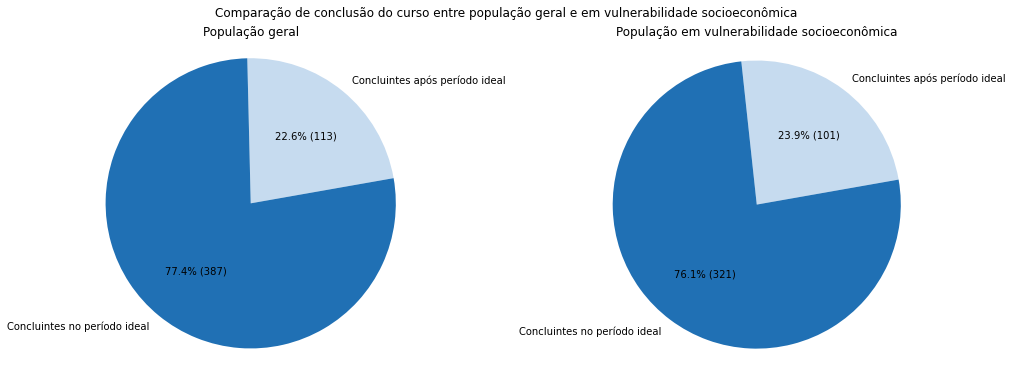

In [69]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def plot(axs, data, title):
    porcentagem_concluida_labels = np.array(['Concluintes após período ideal', 'Concluintes no período ideal'])
    porcentagem_concluida_values = np.array([data[data['porcentagem_concluida_curso'] > 100]['porcentagem_concluida_curso'].count(), data[data['porcentagem_concluida_curso'] <= 100]['porcentagem_concluida_curso'].count()])

    graph = axs.pie(porcentagem_concluida_values, labels=porcentagem_concluida_labels, startangle=10, colors=[cmap_blues(0.25), cmap_blues(0.75)], autopct=lambda p: f'{p:.1f}% ({(p/100)*porcentagem_concluida_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de conclusão do curso entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de conclusão do curso entre população geral e seleção.svg')

**Motivação**

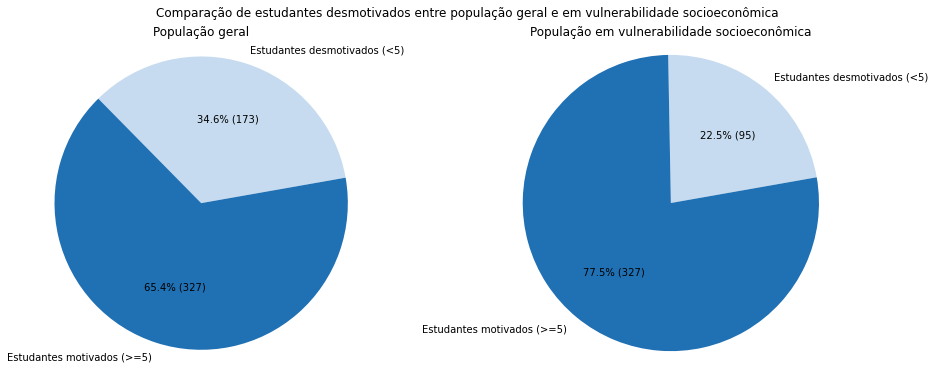

In [70]:
fig, axs = plt.subplots(ncols=2, figsize=(13, 5), constrained_layout=True)


def plot(axs, data, title):
    estudantes_desmotivados_labels = np.array(['Estudantes desmotivados (<5)', 'Estudantes motivados (>=5)'])
    estudantes_desmotivados_values = np.array([data[data['motivação'] < 5].shape[0], data[data['motivação'] >= 5].shape[0]])

    graph = axs.pie(estudantes_desmotivados_values, labels=estudantes_desmotivados_labels, startangle=10, colors=[cmap_blues(0.25), cmap_blues(0.75)], autopct=lambda p: f'{p:.1f}% ({(p/100)*estudantes_desmotivados_values.sum():n})')
    axs.axis('equal')
    axs.set_title(title, pad=10)


plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de estudantes desmotivados entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de estudantes desmotivados entre população geral e seleção.svg')

##### **Análise preliminar de critérios**

**Criação de grupos prioritários por formação escolar e cor**

In [71]:
ep_pre = selecao[(selecao['cor'] == 'preta') & (selecao['escola'] == 'pública')]
ep_bra = selecao[(selecao['cor'] == 'branca') & (selecao['escola'] == 'pública')]
pri_pre = selecao[(selecao['cor'] == 'preta') & (selecao['escola'] == 'privada')]
pri_bra = selecao[(selecao['cor'] == 'branca') & (selecao['escola'] == 'privada')]

**Análise de motivação**

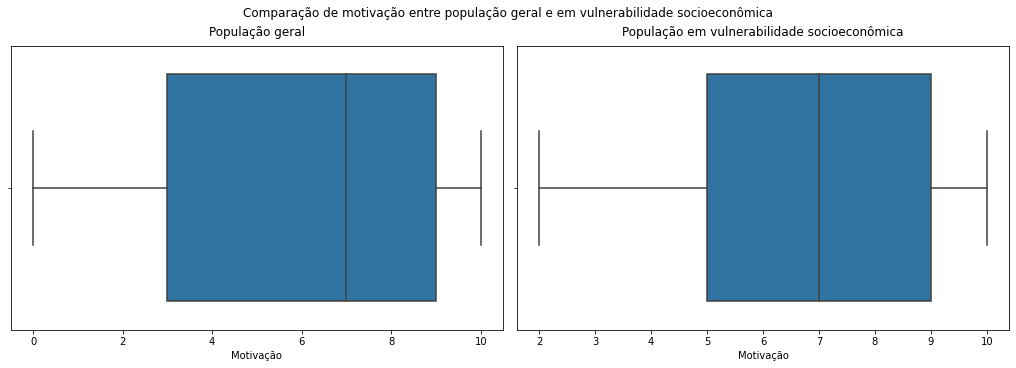

In [72]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 5), constrained_layout=True)


def plot(axs, data, title):
    graph = sns.boxplot(x=data['motivação'], ax=axs)
    graph.set(xlabel='Motivação')
    graph.set_title(title, pad=10)
    

plot(axs[0], data, 'População geral')
plot(axs[1], selecao, 'População em vulnerabilidade socioeconômica')
fig.suptitle('Comparação de motivação entre população geral e em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de motivação entre população geral e seleção.svg')

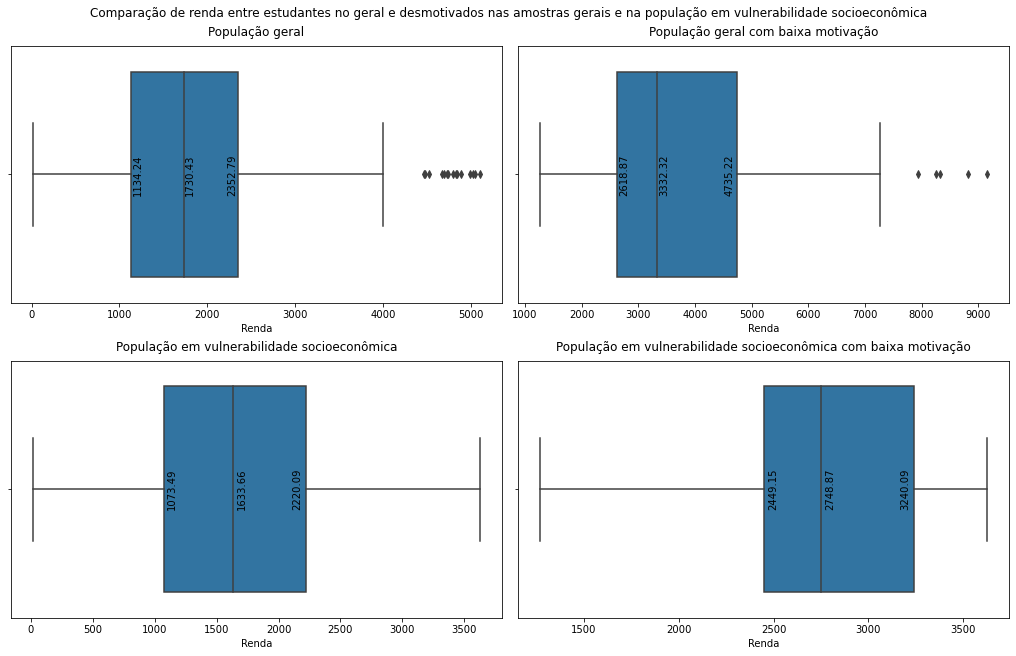

In [73]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14, 9), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0, 0], data, 'População geral')
plot(axs[0, 1], estudantes_desmotivados, 'População geral com baixa motivação')
plot(axs[1, 0], selecao, 'População em vulnerabilidade socioeconômica')
plot(axs[1, 1], selecao[selecao['motivação'] < 5], 'População em vulnerabilidade socioeconômica com baixa motivação')
fig.suptitle('Comparação de renda entre estudantes no geral e desmotivados nas amostras gerais e na população em vulnerabilidade socioeconômica')
plt.show()

fig.savefig('imagens/Comparação de renda entre estudantes e os desmotivados no geral e na seleção.svg')

**Análise de renda por grupo prioritário**

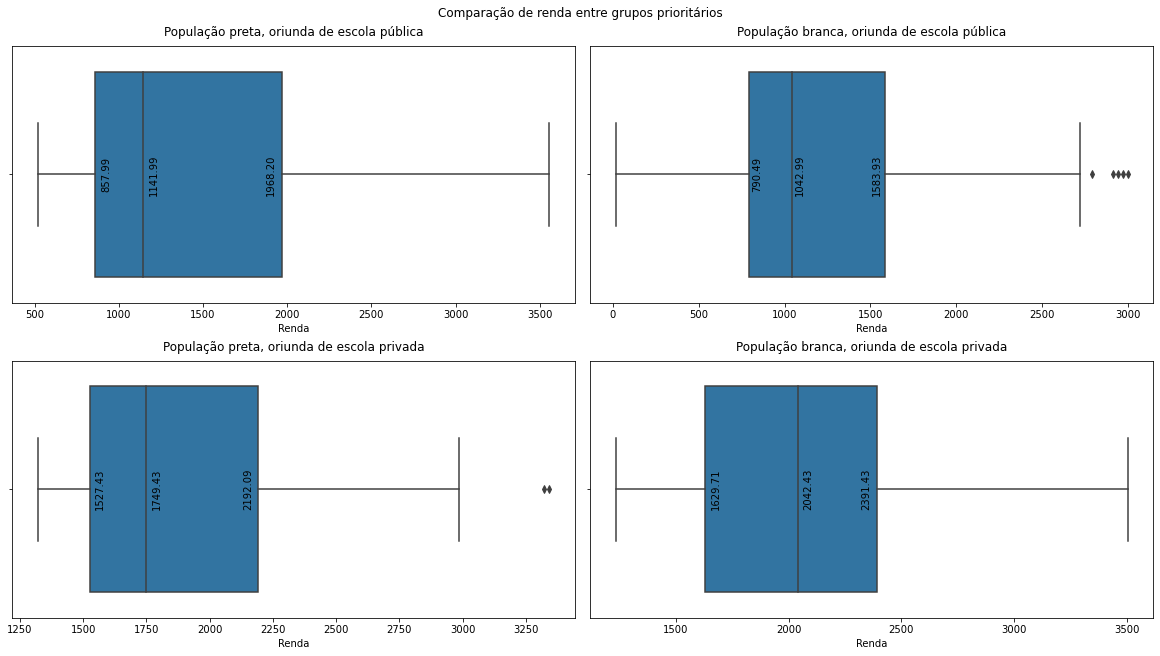

In [74]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 9), constrained_layout=True)


def renda_filter(data):
    renda_IQR = data.quantile(0.75) - data.quantile(0.25)
    renda_filter = (data >= data.quantile(0.25) - 1.5*renda_IQR) & (data <= data.quantile(0.75) + 1.5*renda_IQR)

    return renda_filter

def plot(axs, data, title):
    graph = sns.boxplot(x=data['renda'][renda_filter(data['renda'])], ax=axs)
    graph.set(xlabel='Renda')
    graph.set_title(title, pad=10)

    def legend(data, quantile):
        data = data['renda'][renda_filter(data['renda'])]
        
        iqr_range = data.quantile(0.75) - data.quantile(0.25)
        offset = 0.06*iqr_range
        if quantile == 0.75:
            offset *= -1
        
        graph.annotate(f"{data.quantile(quantile):.2f}", (data.quantile(quantile) + offset, 0), ha='center', va='center', fontsize=10, rotation=90)
    
    legend(data, 0.25)
    legend(data, 0.5)
    legend(data, 0.75)


plot(axs[0, 0], ep_pre, 'População preta, oriunda de escola pública')
plot(axs[0, 1], ep_bra, 'População branca, oriunda de escola pública')
plot(axs[1, 0], pri_pre, 'População preta, oriunda de escola privada')
plot(axs[1, 1], pri_bra, 'População branca, oriunda de escola privada')
fig.suptitle('Comparação de renda entre grupos prioritários')
plt.show()

fig.savefig('imagens/Comparação de renda entre grupos prioritários.svg')

##### **Estabelecimento dos critérios de seleção**

In [75]:
ep = pd.concat([ep_pre, ep_bra])

In [76]:
ep = ep.sort_values(['renda', 'porcentagem_concluida_curso'], ascending=[True, True])
pri_pre = pri_pre.sort_values(['renda', 'porcentagem_concluida_curso'], ascending=[True, True])
pri_bra = pri_bra.sort_values(['renda', 'porcentagem_concluida_curso'], ascending=[True, True])

##### **Simulação nos dados fornecidos**

In [77]:
print(f'EP: {ep.shape[0]}')
print(f'PRI + PRE: {pri_pre.shape[0]}')
print(f'PRI + BRA: {pri_bra.shape[0]}', '\n')
print(f'Total: {sum([ep.shape[0], pri_pre.shape[0], pri_bra.shape[0]])}')

EP: 215
PRI + PRE: 25
PRI + BRA: 182 

Total: 422


In [78]:
computador_por_curso = {
    'administração': 2,
    'ciência da computação': 1,
    'ciência de dados': 1,
    'design': 1,
    'direito': 3,
    'engenharia biomédica': 2,
    'filosofia': 3,
    'história': 3,
    'medicina': 3,
}


selecao['computador'] = pd.NA

for index, row in selecao.iterrows():
    selecao.loc[index, ['computador']] = computador_por_curso[selecao.loc[index, 'curso']]

In [79]:
quantidade_por_computador = selecao['computador'].value_counts().sort_index()
preco_por_computador = pd.Series([4274.80, 3285.77, 2181.43], index=[1, 2, 3])
custo_total_por_computador = quantidade_por_computador.multiply(preco_por_computador)
custo_total = sum(custo_total_por_computador)

In [80]:
print(quantidade_por_computador, '\n')
print(preco_por_computador, '\n')
print(custo_total_por_computador, '\n')
print(f'Custo total: {custo_total}')

1    121
2    100
3    201
Name: computador, dtype: int64 

1    4274.80
2    3285.77
3    2181.43
dtype: float64 

1    517250.80
2    328577.00
3    438467.43
dtype: float64 

Custo total: 1284295.23
